>## **Buisness Problem:**

This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc. Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

In [2]:
# Handling Warnings:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

>## **Exploration of Data**

In [4]:
netflix = pd.read_csv('netflix.csv')

In [5]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [7]:
print('Number of Observations:',netflix.shape[0])
print('Number of Features:',netflix.shape[1])

Number of Observations: 8807
Number of Features: 12


In [8]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
netflix.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [11]:
netflix.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [12]:
netflix.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [14]:
netflix.duplicated().sum()

0

> ## **Creating copy of netflix dataframe:**

In [15]:
df = netflix.copy()
df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8687,s8688,Movie,Waarrior Savitri,Param Gill,"Niharica Raizada, Rajat Barmecha, Lucy Pinder,...",India,"November 1, 2017",2016,TV-14,120 min,"Action & Adventure, International Movies, Sci-...","In a modern adaptation of a mythological tale,..."


>## **Data Wrangling:**

### Unnesting of the columns (directors , casts , countrys ,listed_in)

In [16]:
#df['cast'].str.split(',').explode()
unnesting = ['director', 'cast', 'listed_in','country']
for col in unnesting:
    df[col] = df[col].str.split(',')
    df = df.explode(col)

In [17]:
df.shape

(202065, 12)

In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202065 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202065 non-null  object
 1   type          202065 non-null  object
 2   title         202065 non-null  object
 3   director      151422 non-null  object
 4   cast          199916 non-null  object
 5   country       190168 non-null  object
 6   date_added    201907 non-null  object
 7   release_year  202065 non-null  int64 
 8   rating        201998 non-null  object
 9   duration      202062 non-null  object
 10  listed_in     202065 non-null  object
 11  description   202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [20]:
df.reset_index(drop = True, inplace = True)

In [21]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


In [22]:
df[df['type'] == 'Movie'].nunique()

show_id          6131
type                1
title            6131
director         4886
cast            27879
country           187
date_added       1533
release_year       73
rating             17
duration          205
listed_in          37
description      6105
dtype: int64

In [23]:
netflix[netflix['type'] == 'Movie'].nunique()

show_id         6131
type               1
title           6131
director        4354
cast            5445
country          651
date_added      1533
release_year      73
rating            17
duration         205
listed_in        278
description     6105
dtype: int64

* Insights :

- *Note after unnesting the no.of movies and TvShows rows have increased significantly.*
- *But unique number of movies still remains same i.e 6131, similarly for TV shows it is 2676.*

> ## **Visual Checks for missing data:**

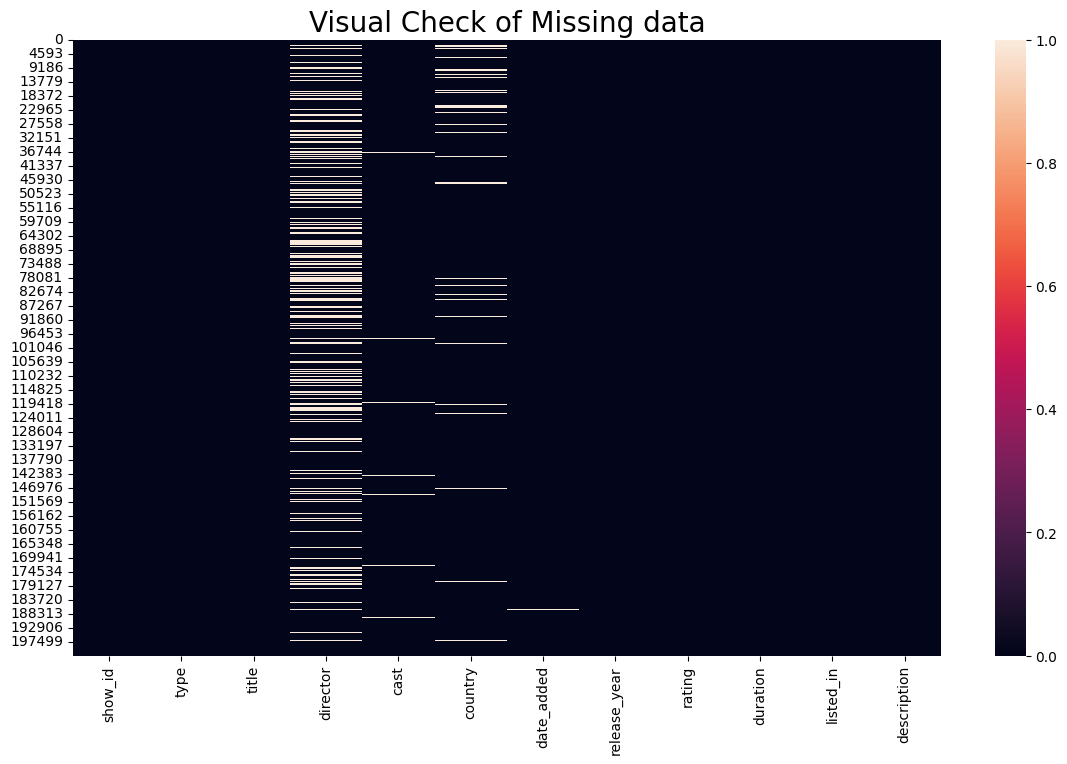

In [24]:
plt.figure(figsize=(14,8))
# Plot Heatmap:
sns.heatmap(df.isnull())
plt.title('Visual Check of Missing data',fontsize = 20)
plt.show()

In [25]:
df.isna().sum()

show_id             0
type                0
title               0
director        50643
cast             2149
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

In [26]:
for i in df.columns:
    null_pct = (df[i].isna().sum()/df.shape[0]) * 100
    if null_pct > 0:
        print(f'Null percent of {i} is {round(null_pct,3)} %.')

Null percent of director is 25.063 %.
Null percent of cast is 1.064 %.
Null percent of country is 5.888 %.
Null percent of date_added is 0.078 %.
Null percent of rating is 0.033 %.
Null percent of duration is 0.001 %.


> ## **Handling Or Treating Null values**:

In [27]:
df['date_added'] = pd.to_datetime(df['date_added'],format="%B %d, %Y" , errors='coerce')

In [28]:
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

In [29]:
df['year_added'] = df['date_added'].dt.year
df.year_added.dtype

dtype('int32')

In [30]:
df["country"].fillna("Unknown", inplace = True)
df["cast"].fillna("Unknown actors", inplace = True)
df["director"].fillna("Unknown director", inplace = True)
df["rating"].fillna("Unknown", inplace = True)

In [31]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
year_added      0
dtype: int64

### Handling duration col:

In [32]:
df.loc[df.director=='Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
126582,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017
131648,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016


In [33]:
df.loc[df.director=='Louis C.K.']['duration']

126582    NaN
131648    NaN
131782    NaN
Name: duration, dtype: object

In [34]:
df.loc[df.director=='Louis C.K.']['duration'].fillna(df.loc[df.director=='Louis C.K.']['rating'])

126582    74 min
131648    84 min
131782    66 min
Name: duration, dtype: object

In [35]:
# df.loc[df['director']=='Louis C.K.']['duration'] = df.loc[df.director=='Louis C.K.']['duration'].fillna(df.loc[df.director=='Louis C.K.']['rating'])
df.loc[df['director']=='Louis C.K.', 'duration']=df.loc[df['director']=='Louis C.K.','duration'].fillna(df.loc[df['director'] == 'Louis C.K.', 'rating'])

In [36]:
df.loc[df.director=='Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
126582,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017
131648,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...,2016


In [37]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

> ## **Analysis of rating column:**

In [38]:
rat_df = df['rating'].value_counts().reset_index()
rat_df

,rating,count
0,TV-MA,73915
1,TV-14,43957
2,R,25860
3,PG-13,16246
4,TV-PG,14926
5,PG,10919
6,TV-Y7,6304
7,TV-Y,3665
8,TV-G,2779
9,NR,1573


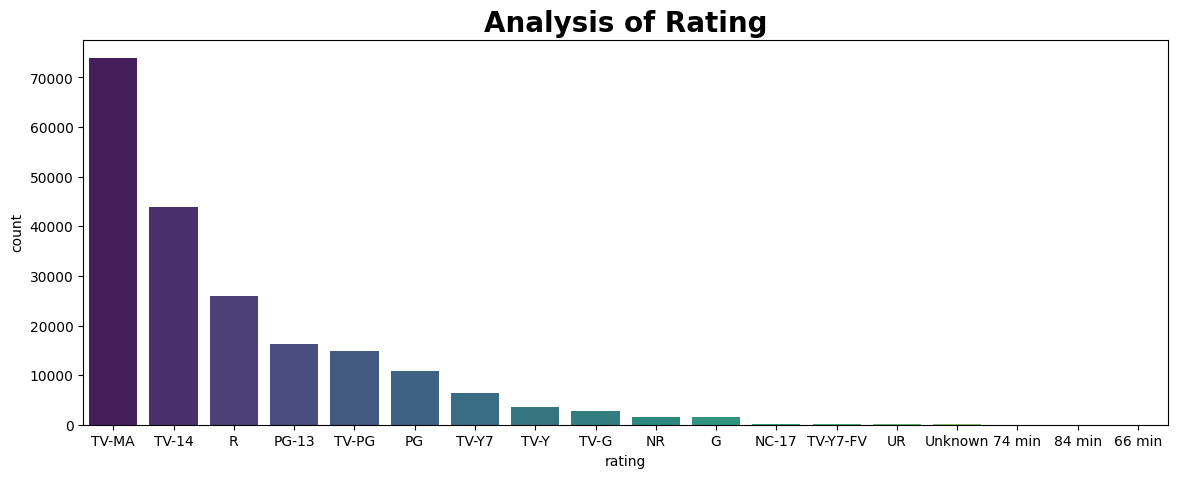

In [39]:
# plot of rating:
plt.figure(figsize=(14,5))
sns.barplot(data = rat_df, x = 'rating', y = 'count', palette='viridis')
plt.title('Analysis of Rating', fontsize = 20 , fontweight = 'bold')
plt.show()

> ## *Segregate the data into movie data and tv-shows data and fill the duration appropriately*

In [40]:
df['type'].value_counts()

type
Movie      145917
TV Show     56148
Name: count, dtype: int64

In [41]:
movies_data = df[df.type=='Movie']
tvshows_data = df[df.type=='TV Show']

In [42]:
print('Shape of the movies data:',movies_data.shape)
print('Shape of the movies data:',tvshows_data.shape)

Shape of the movies data: (145917, 13)
Shape of the movies data: (56148, 13)


In [43]:
movies_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

In [44]:
tvshows_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

### *Splitting duration into runtime_mins and No_of_seasons:*

In [50]:
movies_data['runtime_mins'] = movies_data.duration.str.split(' ').str[0]
tvshows_data['no_of_seasons'] = tvshows_data.duration.str.split(' ').str[0]

In [51]:
movies_data['runtime_mins'] = movies_data['runtime_mins'].astype(int)
tvshows_data.no_of_seasons = tvshows_data.no_of_seasons.astype(int)

In [73]:
print('Movies data types:\n', movies_data.dtypes) 
print('TVshows data types: \n', tvshows_data.dtypes)

Movies data types:
 show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
listed_in               object
year_added               int32
runtime_mins             int32
dtype: object
TVshows data types: 
 show_id                  object
type                     object
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
listed_in                object
year_added                int32
no_of_seasons             int32
dtype: object


In [53]:
movies_data = movies_data.drop(columns=['description','duration']).reset_index(drop=True)
movies_data.shape

(145917, 12)

In [61]:
tvshows_data = tvshows_data.drop(columns=['description','duration']).reset_index(drop=True)
tvshows_data.shape

(56148, 12)

In [65]:
df = df.drop(columns=['description']).reset_index(drop=True)

In [67]:
print(f'Cleaned Netflix data has {df.shape[0]} Number of Rows and {df.shape[1]} Number of Columns.')
print(f'Netflix Movies data has {movies_data.shape[0]} Number of Rows and {movies_data.shape[1]} Number of Columns.')
print(f'Netflix TV shows data has {tvshows_data.shape[0]} Number of Rows and {tvshows_data.shape[1]} Number of Columns.')

Cleaned Netflix data has 202065 Number of Rows and 12 Number of Columns.
Netflix Movies data has 145917 Number of Rows and 12 Number of Columns.
Netflix TV shows data has 56148 Number of Rows and 12 Number of Columns.


> ## **Exploratory Data Analysis (EDA):**

### *Total Content in Netflix:*

In [74]:
df.show_id.nunique()

8807

* Insight:

Total unique overall content present is 8807 in dataset.

### *Q. How are contents distributed in Netflix Platform ?*

In [83]:
d = df.groupby('type')['show_id'].nunique()
d
a = d.reset_index()
a

,type,show_id
0,Movie,6131
1,TV Show,2676


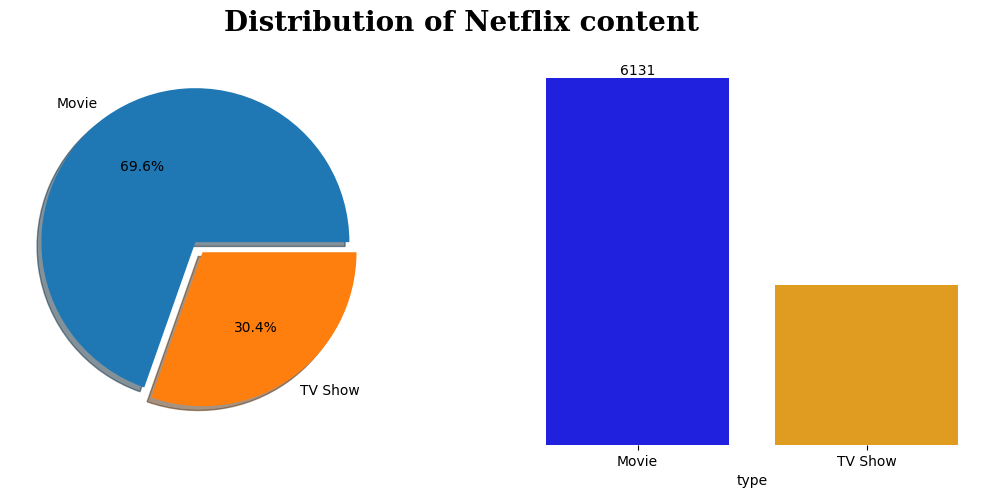

In [103]:
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Netflix content", fontsize = 20, fontweight='bold',fontfamily='serif')

plt.subplot(121)
plt.pie(d, labels = d.index, explode=(0.08,0), shadow=True, autopct='%1.1f%%')

plt.subplot(122)
b= sns.barplot(data = a, x = a.type, y= a.show_id, palette=['blue','orange'])
b.bar_label(b.containers[0])
sns.despine(left=True,bottom=True)
plt.yticks([])
plt.ylabel('');

* Insights :

We can interpret that nearly 70% contents are Movies whereas 30% are Tvshows contents in Netflix content library.

### *Q. In which year maximum contents got released ?*

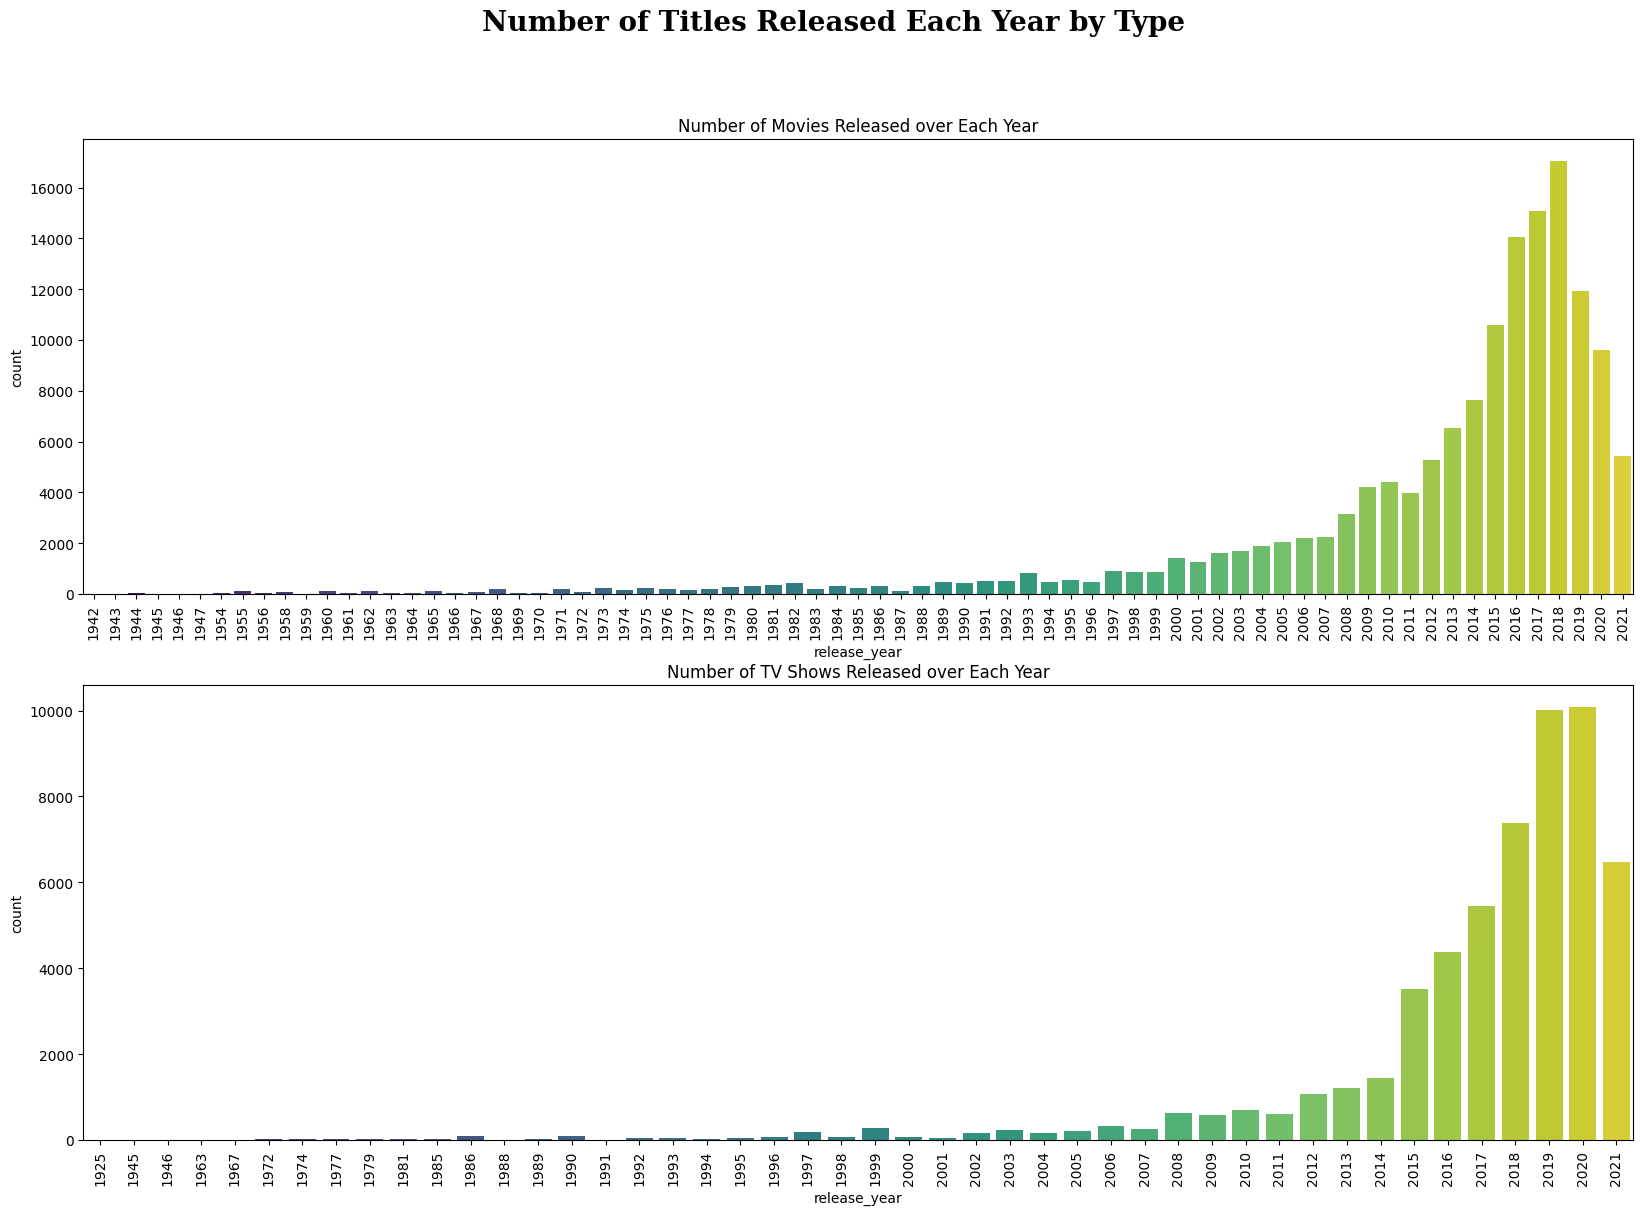

In [120]:
plt.figure(figsize=(20, 13))
plt.suptitle('Number of Titles Released Each Year by Type' ,fontsize = 20, fontweight='bold',fontfamily='serif')

plt.subplot(211)
sns.countplot(data = movies_data, x = 'release_year', palette='viridis')
plt.title('Number of Movies Released over Each Year')
plt.xticks(rotation = 90)

plt.subplot(212)
sns.countplot(data = tvshows_data, x = 'release_year', palette='viridis')
plt.title('Number of TV Shows Released over Each Year')
plt.xticks(rotation = 90)

plt.show()

In [184]:
m = movies_data.groupby('release_year')[['show_id']].nunique()
m = m.reset_index()
m

,release_year,show_id
0,1942,2
1,1943,3
2,1944,3
3,1945,3
4,1946,1
...,...,...
68,2017,767
69,2018,767
70,2019,633
71,2020,517


In [185]:
t = tvshows_data.groupby('release_year')[['show_id']].nunique()
t = t.reset_index()
t

,release_year,show_id
0,1925,1
1,1945,1
2,1946,1
3,1963,1
4,1967,1
5,1972,1
6,1974,1
7,1977,1
8,1979,1
9,1981,1


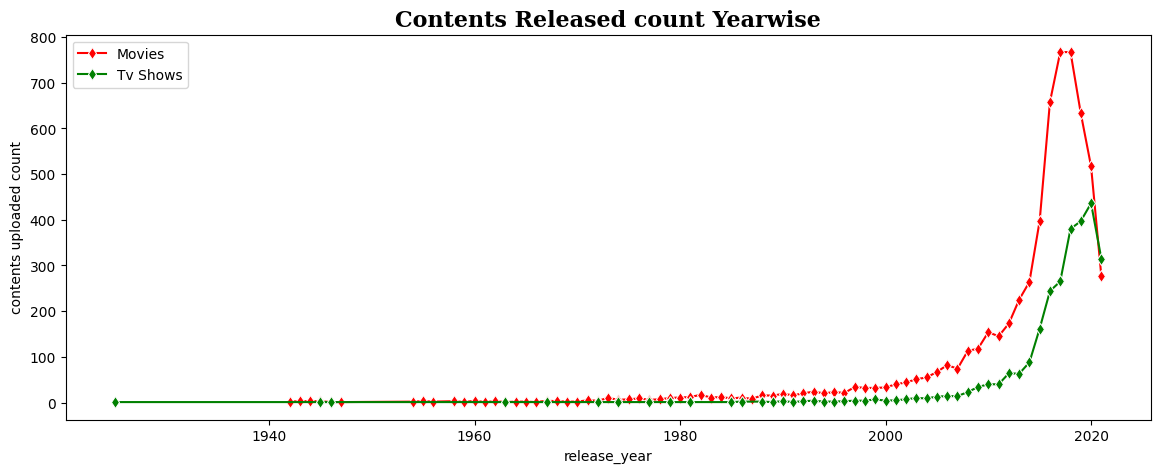

In [189]:
plt.figure(figsize=(14,5))
sns.lineplot(data = m , x='release_year' , y='show_id' , color='r' , label = 'Movies', marker='d')
sns.lineplot(data=t , x='release_year' , y='show_id' , color='green', label='Tv Shows' , marker='d')
plt.title('Contents Released count Yearwise',fontsize=16,fontweight="bold",fontfamily='serif')
plt.ylabel('contents uploaded count')
plt.legend(loc='upper left')
plt.show()

* Insights :

- The Line plot uses two distinct lines in different colors (Red for movies and Green for TV shows) use to observe side-by-side.
- The plot discloses that Movies has been more dominant in terms of release counts in any given year and in the recent past audience focus shifts on watching web series.
- Netflix began enlarging their movies contents library from 2000 and acquired maximum contents so far in 2018 followed by 2016 & 2017.
-  Netflix began enlarging their TV shows contents library from 2008 and acquired maximum contents so far in 2020 followed by 2019 & 2018.
-  Netflix has been continuously expanding its content library, offering more choices to its subscribers.

### *Q. What are the top 10 countries that are having higher consumption of movies and tvshows ?*

In [172]:
# based on country content count with movies
mc = movies_data.groupby('country')[['show_id']].nunique().sort_values(by='show_id',ascending=False)
mc = mc[mc.index != ('Unknown')]
mc = mc.rename(columns = {'show_id':'Counts'}) 
mc = mc[:10]
mc

,Counts
country,
United States,2364
India,927
United States,388
United Kingdom,382
Canada,187
France,155
United Kingdom,152
France,148
Canada,132


In [143]:
# based on country content count with tvshows
tc = tvshows_data.groupby('country')[['show_id']].nunique().sort_values(by='show_id',ascending=False)
tc = tc[tc.index != ('Unknown')]
tc = tc.rename(columns = {'show_id':'Counts'})
tc = tc[:10]
tc

,Counts
country,
United States,847
United Kingdom,246
Japan,174
South Korea,164
United States,91
Canada,84
India,81
Taiwan,70
France,64


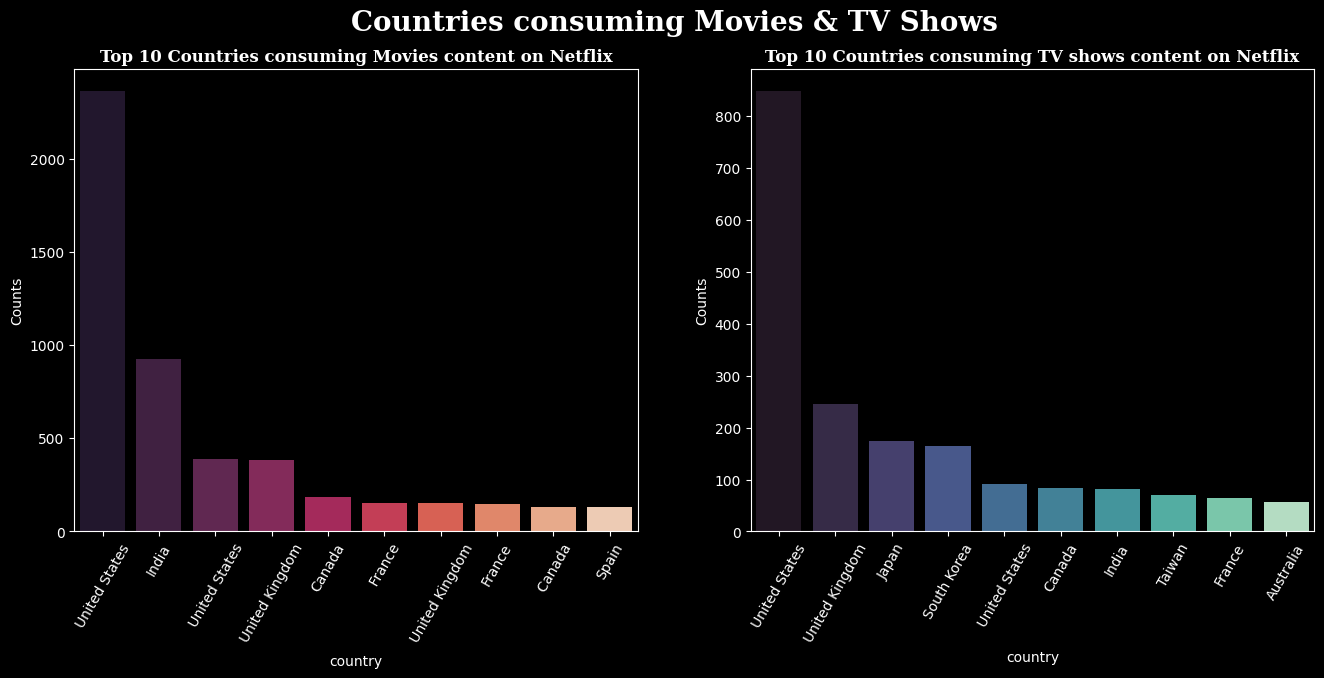

In [217]:
plt.figure(figsize=(16,6))
plt.suptitle('Countries consuming Movies & TV Shows', fontsize=20,fontweight="bold",fontfamily='serif')
plt.style.use('default')
plt.style.use('dark_background')

plt.subplot(121)
sns.barplot(data = mc, x=mc.index , y=mc.Counts, palette='rocket')
plt.xticks(rotation=60)
plt.title('Top 10 Countries consuming Movies content on Netflix',fontweight="bold",fontfamily='serif')

plt.subplot(122)
sns.barplot(tc, x = tc.index , y=tc.Counts, palette='mako')
plt.xticks(rotation=60)
plt.title('Top 10 Countries consuming TV shows content on Netflix',fontweight="bold",fontfamily='serif');


* Insights :

- Amongst the top 10 countries with the highest count of Movies are US, India and uk.

- Amongst the top 10 countries with the highest count of Tv shows are US, uk and japan .
  
- We can infer that US , India , UK , France , Canada , Japan are the top entertainment consumers while other countries significantly contribute to the OTT content library.


### *Q. How much contents were added every year in netflix ?*

In [174]:
yc = df.groupby(['year_added','type'])[['show_id']].nunique().reset_index()
yc.sort_values(by='show_id',ascending=False)

,year_added,type,show_id
18,2019,Movie,1424
20,2020,Movie,1284
16,2018,Movie,1237
22,2021,Movie,993
14,2017,Movie,839
21,2020,TV Show,692
19,2019,TV Show,575
23,2021,TV Show,505
17,2018,TV Show,388
15,2017,TV Show,325


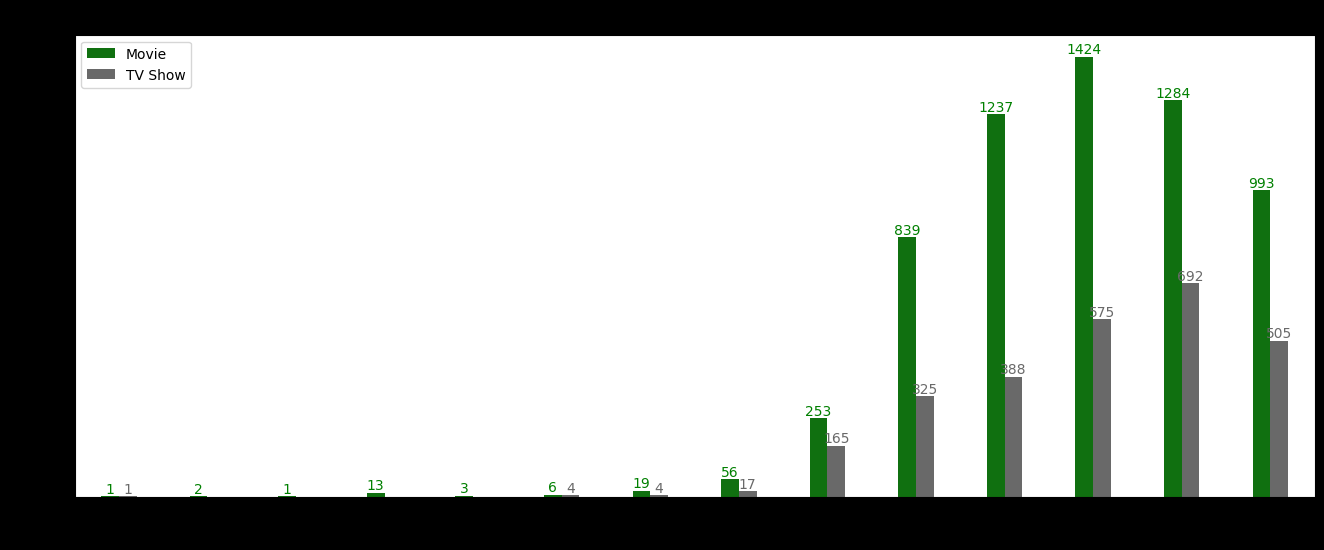

In [220]:
plt.figure(figsize=(16,6))
plt.style.use('default')

c = sns.barplot(data = yc, x = 'year_added' , y = 'show_id' , hue = 'type', palette=['green','dimgrey'] , width=0.4)
plt.title('Contents added to Netflix Yearwise', fontsize=16,fontweight="bold",fontfamily='serif')
c.bar_label(c.containers[0],color='green')
c.bar_label(c.containers[1],color='dimgray')
plt.legend(loc='upper left')
plt.show()

In [181]:
tvs= tvshows_data.groupby(['year_added','type'])[['show_id']].nunique().reset_index()
tvs

,year_added,type,show_id
0,2008,TV Show,1
1,2013,TV Show,4
2,2014,TV Show,4
3,2015,TV Show,17
4,2016,TV Show,165
5,2017,TV Show,325
6,2018,TV Show,388
7,2019,TV Show,575
8,2020,TV Show,692
9,2021,TV Show,505


In [182]:
mov= movies_data.groupby(['year_added','type'])[['show_id']].nunique().reset_index()
mov

,year_added,type,show_id
0,2008,Movie,1
1,2009,Movie,2
2,2010,Movie,1
3,2011,Movie,13
4,2012,Movie,3
5,2013,Movie,6
6,2014,Movie,19
7,2015,Movie,56
8,2016,Movie,253
9,2017,Movie,839


* Insights :

Netflix's content acquisition strategy over time.

- The bar plot shows the distribution of content added to Netflix over the different years.
- There is an increasing trend in the total number of content items added to Netflix over the years.
- Or can be suggested that Netflix has been continuously expanding its content library.
- Some years show significant spikes, while others have lower counts, indicating variations in content acquisition.
- Most of movies content added on netflix is on 2019 very significant.
- similarly for tv shows, it is 2020.
- Tv shows added are comparetively less than movies.

### *Q. How the contents genre segregated ?*

In [191]:
mg = movies_data.groupby(['listed_in'])[['title']].nunique().sort_values(by = 'title', ascending=False)
mg = mg.reset_index()
mg.head()

,listed_in,title
0,International Movies,2624
1,Dramas,1600
2,Comedies,1210
3,Action & Adventure,859
4,Documentaries,829


In [193]:
tg = tvshows_data.groupby(['listed_in'])[['title']].nunique().sort_values(by='title',ascending=False)
tg = tg.reset_index()
tg.head()

,listed_in,title
0,International TV Shows,774
1,TV Dramas,696
2,International TV Shows,577
3,TV Comedies,461
4,Crime TV Shows,399


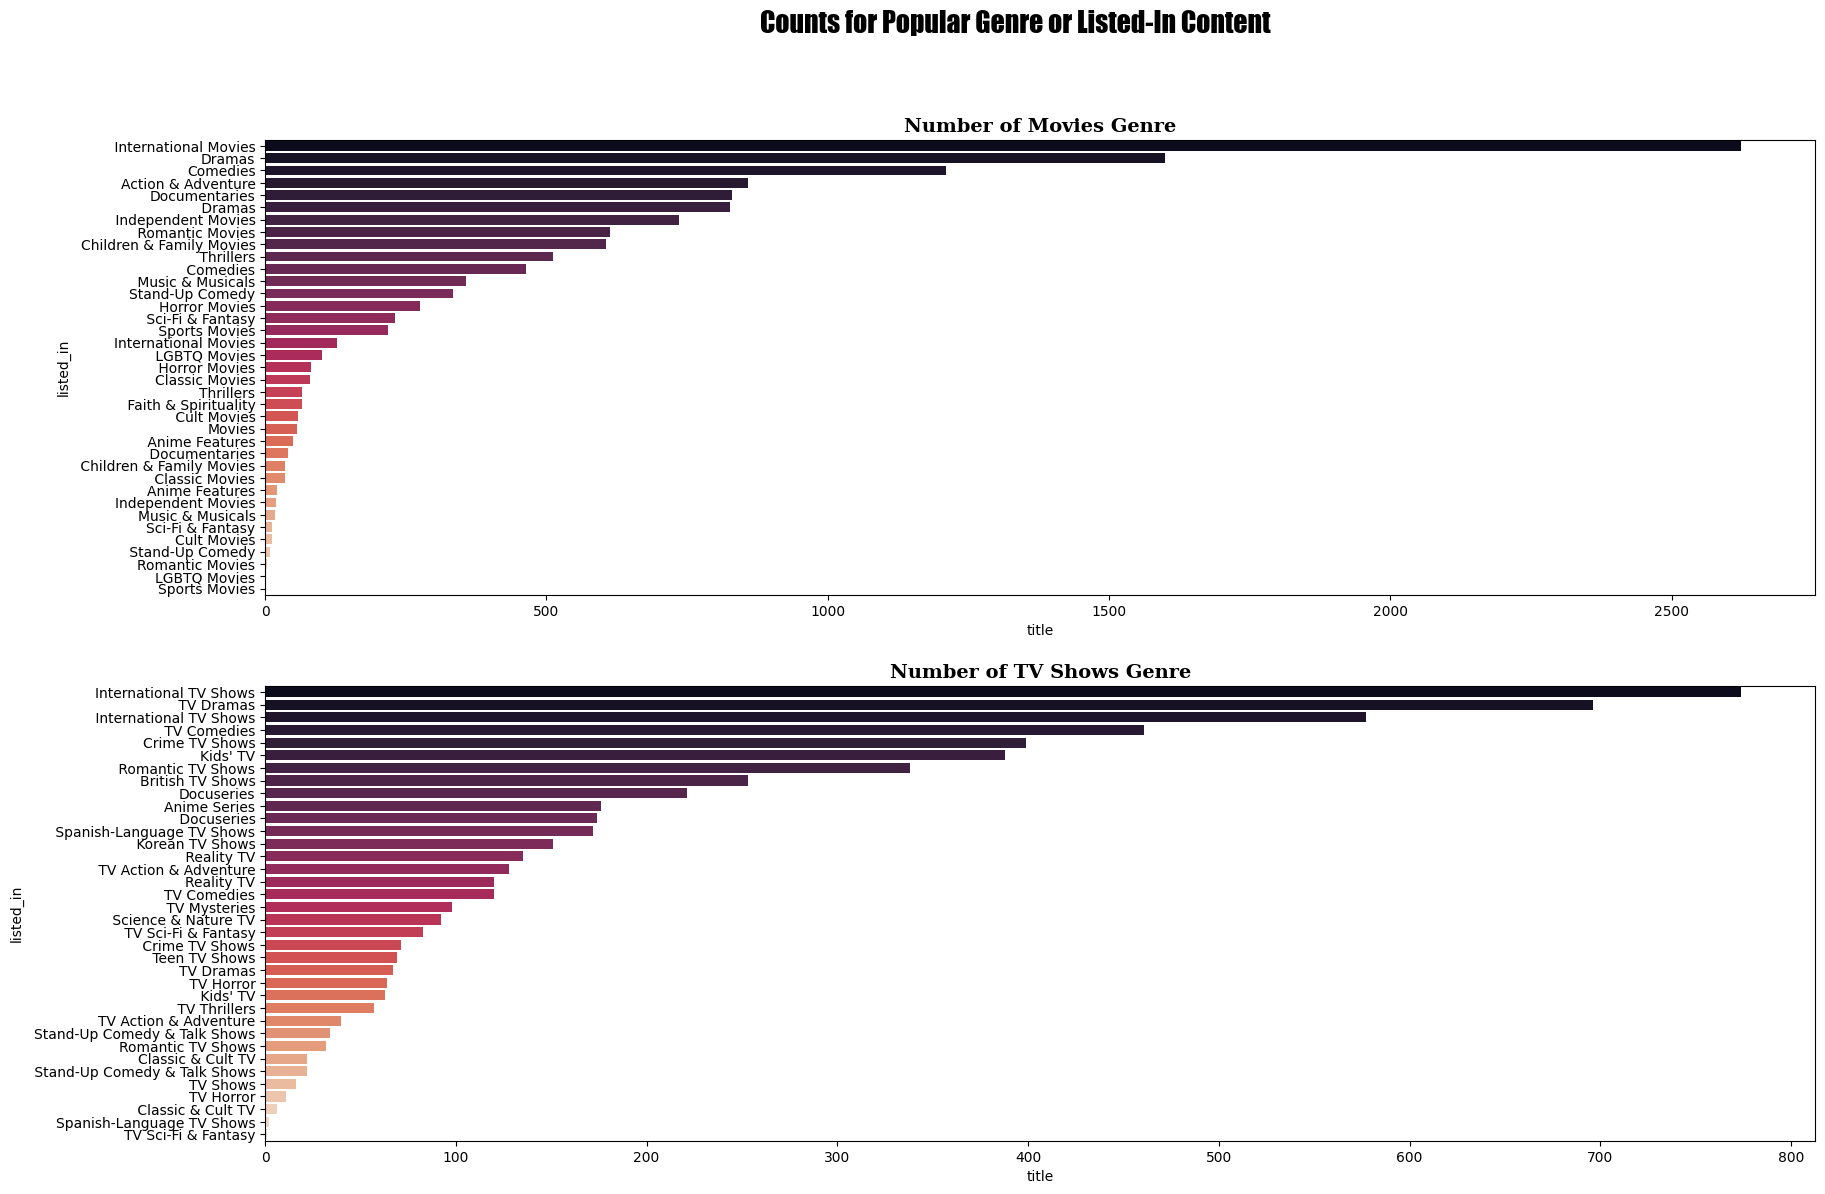

In [221]:
plt.figure(figsize=(20, 13))
plt.suptitle('Counts for Popular Genre or Listed-In Content' , fontsize = 20, fontweight='bold',fontfamily='fantasy')

plt.subplot(211)
sns.barplot(data = mg, y = 'listed_in', x = 'title', palette='rocket')
plt.title('Number of Movies Genre',fontsize = 14, fontweight='bold',fontfamily='serif')

plt.subplot(212)
sns.barplot(data = tg, y = 'listed_in', x = 'title' ,palette='rocket')
plt.title('Number of TV Shows Genre', fontsize = 14 , fontweight='bold',fontfamily='serif')

plt.show()

### *Genre Word Cloud:*

In [204]:
#pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --------- ----------------------------- 71.7/300.2 kB 975.2 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/300.2 kB 1.0 MB/s eta 0:00:01
   -------------------- ------------------- 153.6/300.2 kB 1.0 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 1.1 MB/s eta 0:00:01
   ----------------------------------- ---- 266.2/300.2 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 661.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated p

In [205]:
from wordcloud import WordCloud

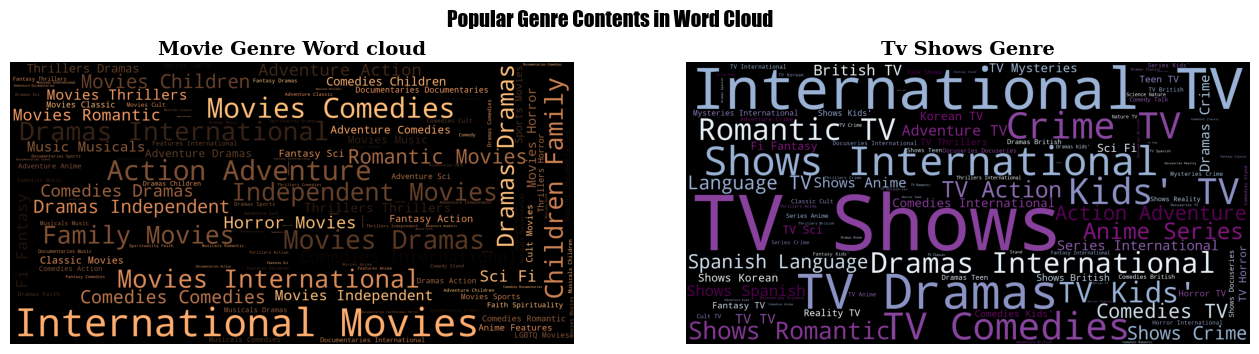

In [222]:
plt.figure(figsize=(16,4))
plt.suptitle('Popular Genre Contents in Word Cloud' , fontsize = 15,fontweight="bold",fontfamily='fantasy')

plt.subplot(1,2,1)
m_g = WordCloud(width=1600, height=800, background_color ='black', colormap ='copper').generate(movies_data.listed_in.to_string())
plt.imshow(m_g)
plt.axis('off')
plt.title("Movie Genre Word cloud",fontsize=14,fontweight='bold',fontfamily='serif')

plt.subplot(1,2,2)
t_g = WordCloud(width=1600, height=800, background_color='black', colormap='BuPu_r').generate(tvshows_data.listed_in.to_string())
plt.imshow(t_g)
plt.axis('off')
plt.title("Tv Shows Genre",fontsize=14,fontweight='bold',fontfamily='serif')

plt.show()

- Insights :

- The plot shows the popularity of various genres in Movies and TV Shows on the platform.
- Here, we can see that International movies , Dramas , Comedies are the Top and Evergreen genres.
- The plot provides insights into audience preferences, indicating which genres are more prevalent in Movies and TV Shows.

### *Q. what type of genre's generally preferred by directors ?*

In [237]:
mgd = movies_data.groupby('listed_in')['director'].nunique().sort_values(ascending=False)
mgd.drop_duplicates()

listed_in
 International Movies        2170
Dramas                       1429
Comedies                     1057
Documentaries                 840
 Independent Movies           765
 Dramas                       759
Action & Adventure            715
Children & Family Movies      536
 Romantic Movies              531
 Thrillers                    487
 Comedies                     424
 Music & Musicals             333
Horror Movies                 268
 Sci-Fi & Fantasy             243
 Sports Movies                226
Stand-Up Comedy               189
International Movies          119
 LGBTQ Movies                 105
 Horror Movies                 84
Thrillers                      63
Classic Movies                 62
 Cult Movies                   60
 Anime Features                48
Movies                         37
 Children & Family Movies      36
 Classic Movies                35
 Documentaries                 34
Independent Movies             24
Music & Musicals               21
Sci-

In [224]:
tgd = tvshows_data.groupby('listed_in')['director'].nunique().sort_values(ascending=False)
tgd

listed_in
International TV Shows           92
 TV Dramas                       90
 International TV Shows          74
Crime TV Shows                   70
 TV Comedies                     47
 Docuseries                      39
Docuseries                       39
TV Shows                         30
 Romantic TV Shows               30
British TV Shows                 26
 Spanish-Language TV Shows       21
 TV Mysteries                    17
Kids' TV                         16
 TV Action & Adventure           16
 Korean TV Shows                 13
 Crime TV Shows                  12
Anime Series                     12
 TV Horror                       11
 TV Thrillers                    10
Stand-Up Comedy & Talk Shows     10
TV Comedies                       8
 TV Sci-Fi & Fantasy              6
 Reality TV                       6
 Stand-Up Comedy & Talk Shows     6
 Kids' TV                         5
 Science & Nature TV              5
 Teen TV Shows                    4
TV Action & Advent

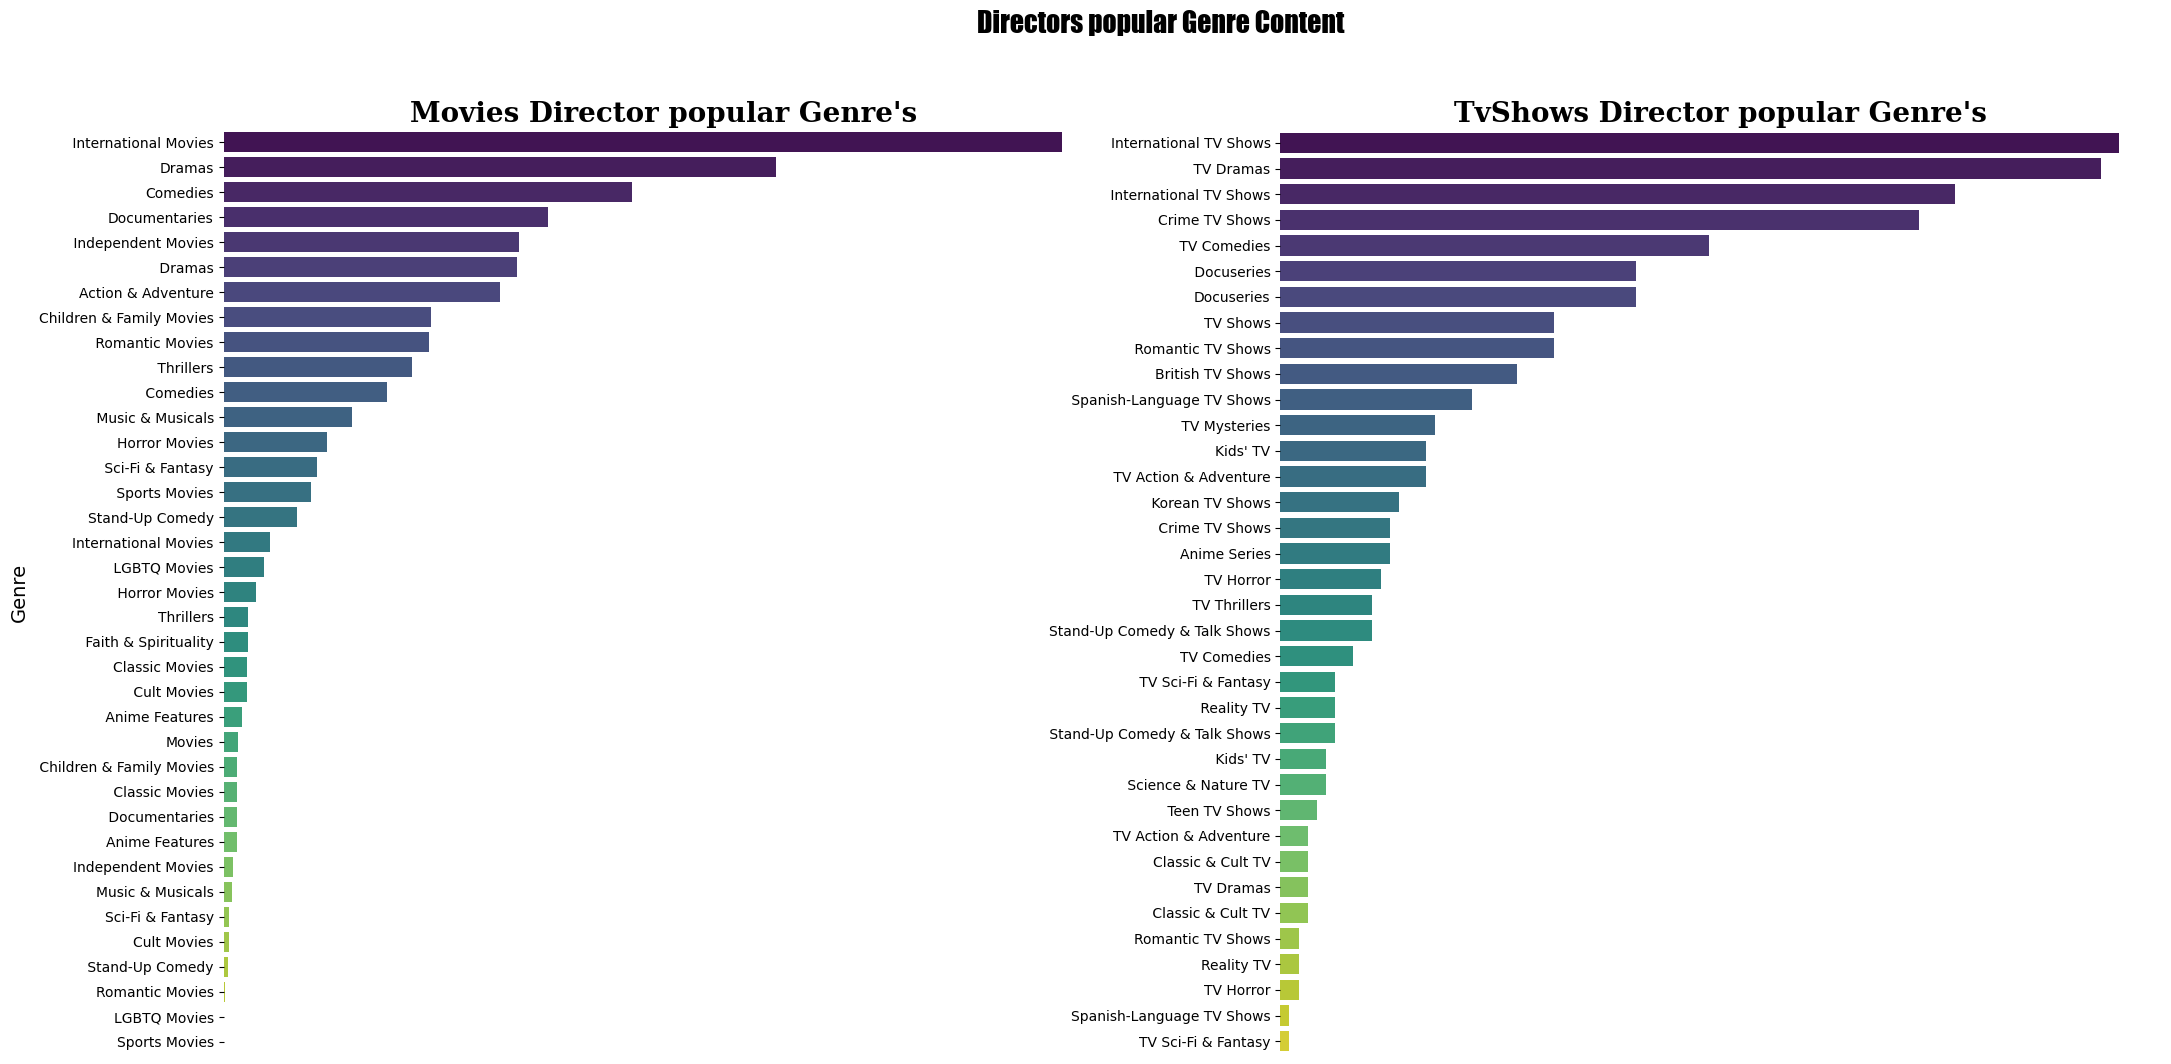

In [236]:
plt.figure(figsize=(25, 12))
plt.suptitle('Directors popular Genre Content', fontsize=20,fontweight="bold",fontfamily='fantasy')
plt.style.use('seaborn-v0_8-bright')

plt.subplot(1,2,1)
sns.barplot(y = mgd.index, x = mgd.values, palette='viridis')
plt.title('Movies Director popular Genre\'s',fontsize=20, fontweight="bold",fontfamily='serif')
plt.ylabel('Genre',fontsize = 14)
plt.xticks([])

plt.subplot(1,2,2)
sns.barplot(y = tgd.index, x = tgd.values, palette ='viridis')
plt.title('TvShows Director popular Genre\'s',fontsize=20, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)
plt.ylabel('')
plt.xticks([])

plt.show()

* Insights:

- The popular genre that the directors are more comfortable indicates that Netflix has content on all genres in its library.
- The top genres with the most directors are International Movies & Tv shows, Dramas, Comedies, Documentaries, Independent Movies, and Action & Adventure.

### *Q. How contents are distributed based on Runtime for Movies & Seasons for TV Shows ?*

In [238]:
mr = movies_data.groupby(['runtime_mins'])[['title']].nunique().sort_values(by = 'title', ascending=False)
mr = mr.reset_index()
mr

,runtime_mins,title
0,90,152
1,97,146
2,93,146
3,94,146
4,91,144
...,...,...
200,189,1
201,191,1
202,193,1
203,194,1


In [239]:
ts = tvshows_data.groupby(['no_of_seasons'])[['title']].nunique().sort_values(by = 'title', ascending=False)
ts = ts.reset_index()
ts

,no_of_seasons,title
0,1,1793
1,2,425
2,3,199
3,4,95
4,5,65
5,6,33
6,7,23
7,8,17
8,9,9
9,10,7


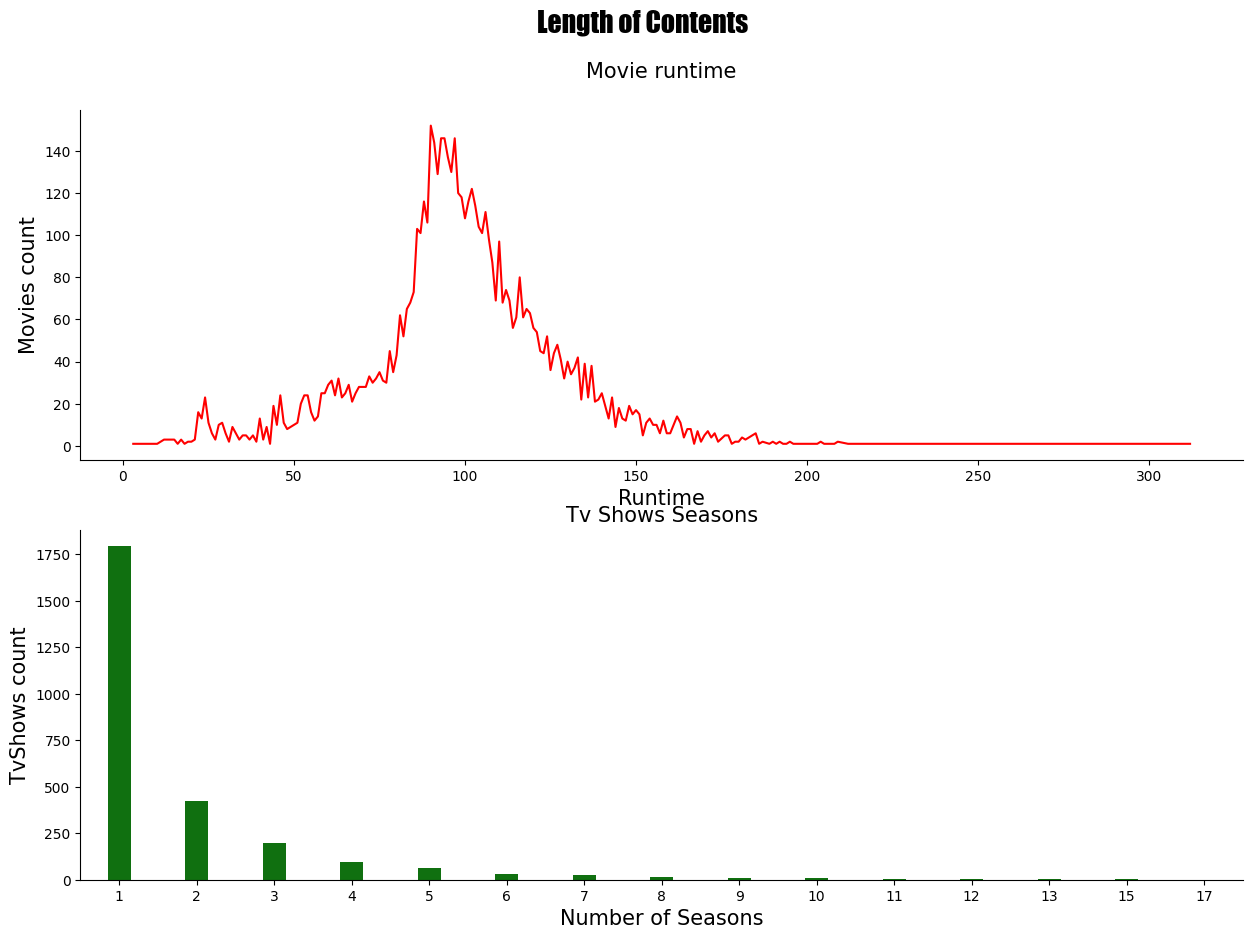

In [257]:
plt.figure(figsize=(15,10))
plt.suptitle('Length of Contents', fontsize=20,fontweight="bold", fontfamily='fantasy')

plt.subplot(2,1,1)
sns.lineplot(data = mr , y='title' , x='runtime_mins' , color='red')
#sns.despine()
plt.title('Movie runtime\n' ,fontsize=15)
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Movies count', fontsize=15)


plt.subplot(2,1,2)
sns.barplot(data = ts , y='title' , x='no_of_seasons' , color='green' , width=0.3)
sns.despine()
plt.title('Tv Shows Seasons', fontsize=15)
plt.xlabel('Number of Seasons', fontsize=15)
plt.ylabel('TvShows count', fontsize=15);

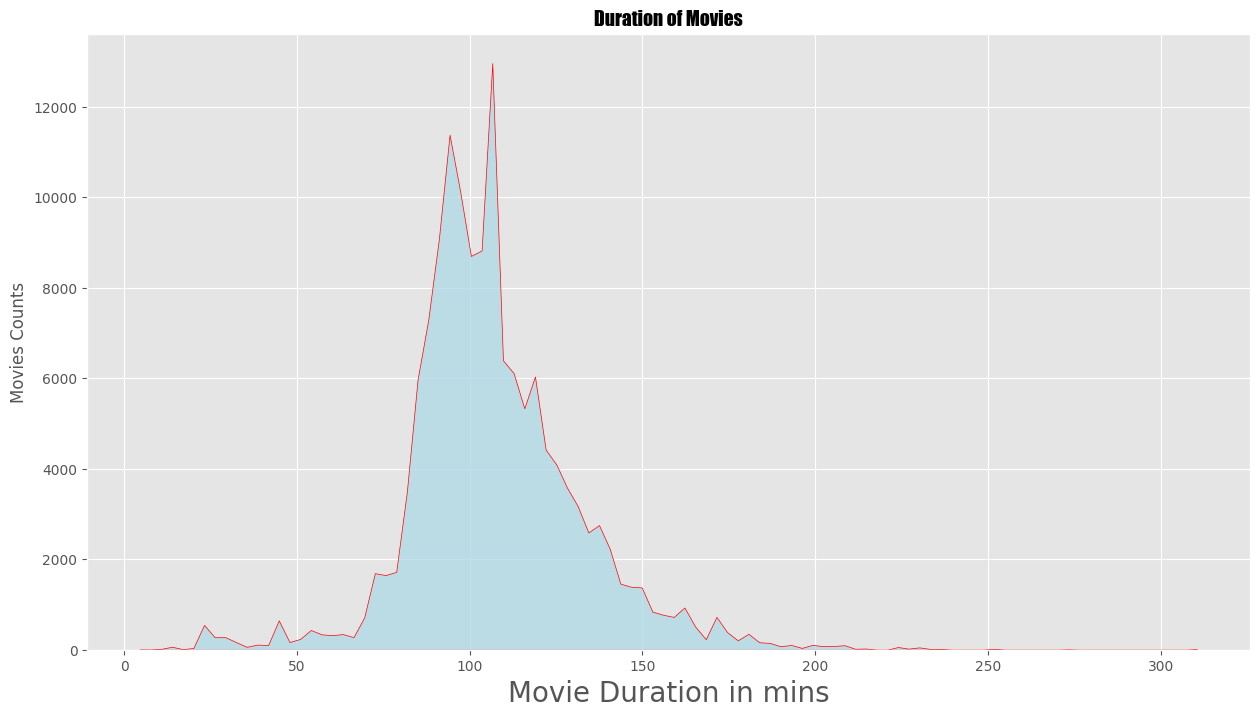

In [284]:
plt.figure(figsize=(15,8))
sns.histplot(x = movies_data.runtime_mins, bins = 100, color ='lightblue', edgecolor = 'red', element="poly")
plt.xlabel("Movie Duration in mins",fontsize = 20)
plt.ylabel("Movies Counts", fontsize=12)
plt.title("Duration of Movies", fontsize=14, fontfamily='fantasy'); 

* Insights :

- The majority of movies appears to have a runtime around 90-120 minutes .
- This is evident from the peak in the red line plot having highlighted the maximum value (maximum movie count).
- Thus, it is following the normal or Gaussian distribution.
- In the TV shows, there are a higher number of TV shows with a smaller number of seasons (1 - 3 seasons), and the counts gradually decrease as the number of seasons increases.
- Thus, shows the decreasing trend. 

### *Q. Analysis on the ratings given for the contents uploaded on netflix ?* 

In [280]:
mr = movies_data.groupby('rating')[['title']].nunique().sort_values(by = 'rating')
mr = mr.reset_index()
mr

,rating,title
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3
5,NR,75
6,PG,287
7,PG-13,490
8,R,797
9,TV-14,1427


In [278]:
tv_r = tvshows_data.groupby(['rating'])[['title']].nunique().reset_index()
tv_r = tv_r.sort_values(by='rating')
tv_r

,rating,title
0,NR,5
1,R,2
2,TV-14,733
3,TV-G,94
4,TV-MA,1145
5,TV-PG,323
6,TV-Y,176
7,TV-Y7,195
8,TV-Y7-FV,1
9,Unknown,2


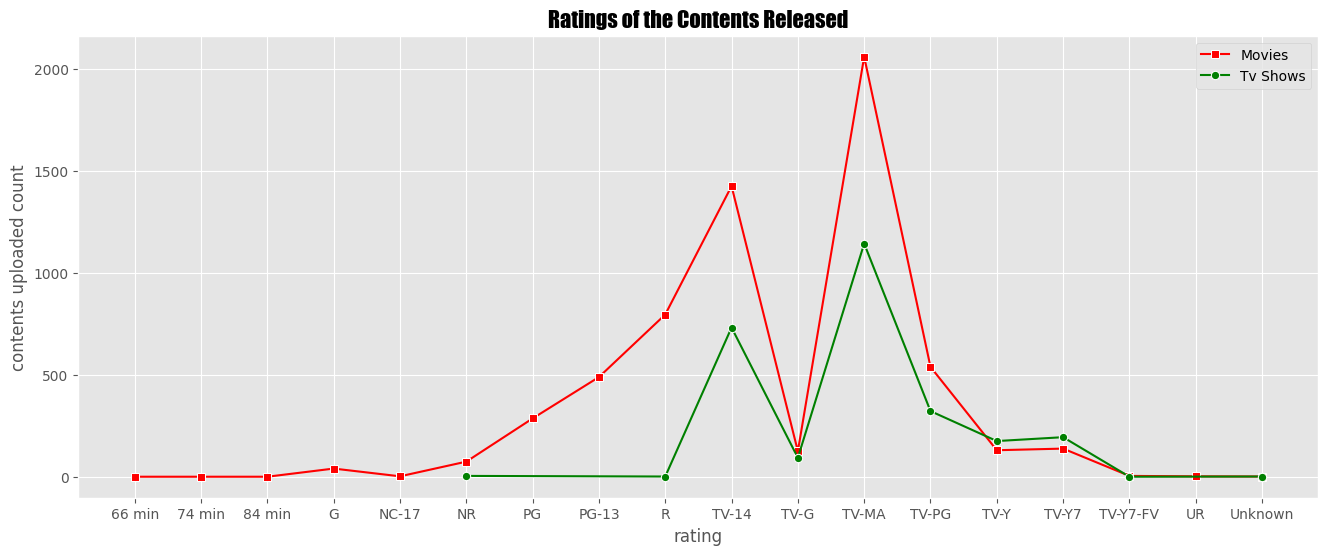

In [285]:
plt.figure(figsize=(16,6))
plt.style.use('ggplot')
sns.lineplot(data = mr , x='rating' , y='title' , color='r' , label = 'Movies', marker='s')
sns.lineplot(data = tv_r , x='rating' , y='title' , color='green', label='Tv Shows' , marker='o')
plt.title('Ratings of the Contents Released',fontsize=16,fontweight="bold", fontfamily='fantasy')
plt.ylabel('contents uploaded count')
plt.legend(loc='upper right')
plt.show()

* Insights :

MOVIES

- The most common content rating is "TV-MA," with a total of 2062 in  number, typically associated with content intended for mature audiences.
- "TV-14" is the second most common rating, with 1427 content count indicating content suitable for viewers of age 14 and older.
- "Restricted: R - Under 17 requires accompanying parent or adult guardian" is the third most common rating, with 797 titles.

TV SHOWS

- The "TV-MA" rating with 1145 titles suggests that a significant portion of the content is intended for mature audiences.
- "TV-14" is the second most common rating, with 733 titles indicates that contents are for viewers aged 14 and older.
- "TV-PG" - parental guidance is recommended stands third with 323 contents in Tv programs.


### *Q. Analysis on the top 20 actors?*

In [307]:
mo_c = movies_data.groupby('cast')[['show_id']].nunique().sort_values(by = 'show_id', ascending= False)[1:21]
mo_c

,show_id
cast,
Anupam Kher,38
Om Puri,27
Rupa Bhimani,27
Shah Rukh Khan,26
Paresh Rawal,25
Boman Irani,25
Julie Tejwani,24
Akshay Kumar,23
Rajesh Kava,21


In [299]:
tv_c = tvshows_data.groupby('cast')[['title']].nunique().sort_values(by = 'title', ascending= False)[1:21]
tv_c

,title
cast,
Takahiro Sakurai,24
Yuki Kaji,17
Junichi Suwabe,17
Ai Kayano,17
Daisuke Ono,14
David Attenborough,14
Takehito Koyasu,13
Yoshimasa Hosoya,13
Yuichi Nakamura,13


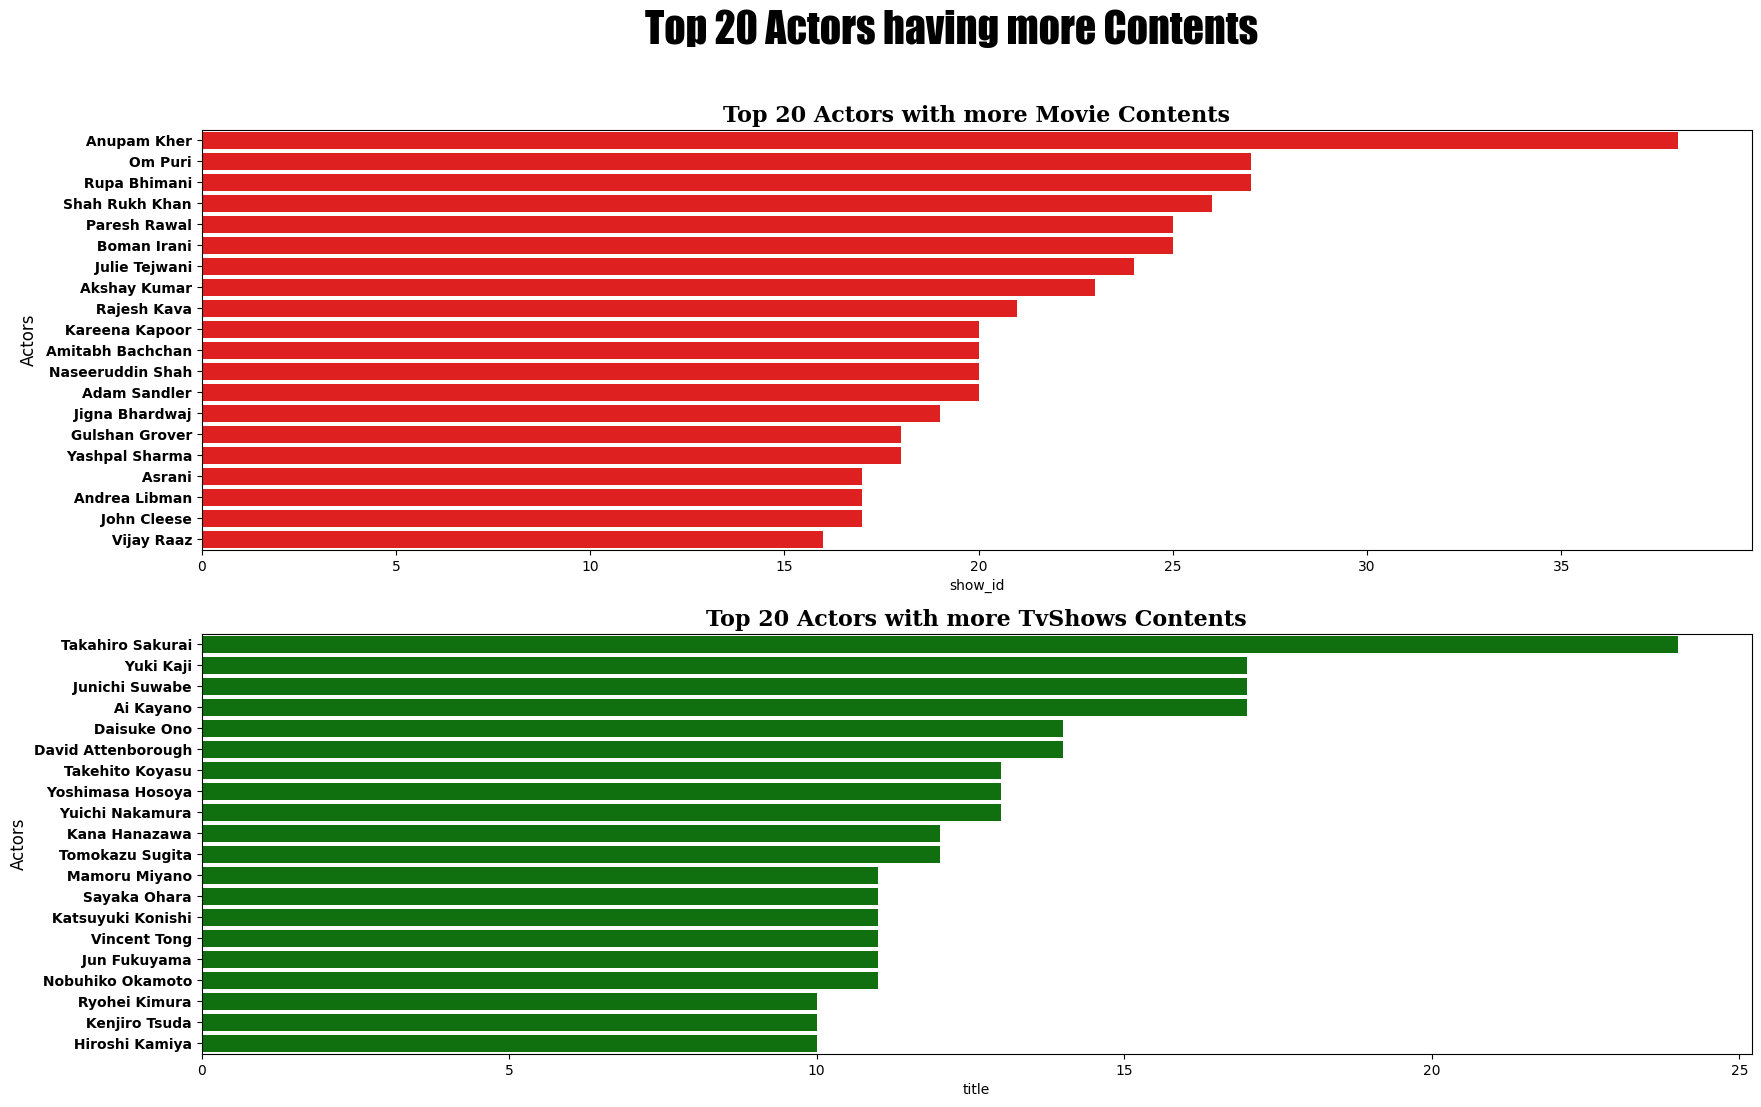

In [309]:
plt.figure(figsize=(20,12))
plt.suptitle('Top 20 Actors having more Contents', fontsize=30,fontweight="bold",fontfamily='fantasy')
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

plt.subplot(2,1,1)
sns.barplot(mo_c, y = mo_c.index , x = 'show_id', color='red')
plt.title('Top 20 Actors with more Movie Contents', fontsize=16,fontweight="bold",fontfamily='serif')
plt.yticks(fontweight='bold')
plt.ylabel('Actors',fontsize=12)

plt.subplot(2,1,2)
sns.barplot(tv_c, y = tv_c.index , x ='title',color='green')
plt.title('Top 20 Actors with more TvShows Contents', fontsize=16,fontweight="bold",fontfamily='serif')
plt.yticks(fontweight='bold')
plt.ylabel('Actors',fontsize=12)

plt.show()

* Insights:-

Movies

- The list includes actors from different film industries and countries. .
- This diversity in the list reflects the global nature of the entertainment industry.
- Anupam Kher has appeared in the most movies (42) followed Om Puri	(27), Rupa Bhimani (27)
and Shah Rukh Khan (26), establishing themselves as a prominent figure in the industry.
- Few actresses from the top 20 list are, Julie Tejwani, kareena kapoor etc.
- Several actors and actresses, including Paresh Rawal, Julie Tejwani, Amitabh Bachchan, Rajesh Kava, and Boman Irani, have been featured in a substantial number of movies.


TvShows

- Takahiro Sakurai stands out as the Voice actor with the highest count of shows (25), indicating a abundant amount of work in the field.
Yuki Kaji, Junichi Suwabe, Daisuke Ono, and Ai Kayano all have significant counts, that is of 17 titles, demonstrating their prominence in the acting industry.
- Both Japanese voice actors (seiyuu) and international actors like David Attenborough and Vincent Tong are recognized for their work in different contexts and markets.

### *Q. Analysis on Top 20 directors?* 

In [306]:
md = movies_data.groupby('director')[['show_id']].nunique()
md = md.sort_values(by='show_id',ascending=False)[1:21]
md

,show_id
director,
Rajiv Chilaka,22
Raúl Campos,18
Jan Suter,18
Suhas Kadav,16
Jay Karas,15
Marcus Raboy,15
Cathy Garcia-Molina,13
Jay Chapman,12
Martin Scorsese,12


In [303]:
tsd = tvshows_data.groupby('director')[['show_id']].nunique()
tsd = tsd.sort_values(by='show_id',ascending=False)[1:21]
tsd

,show_id
director,
Ken Burns,3
Alastair Fothergill,3
Rob Seidenglanz,2
Shin Won-ho,2
Jung-ah Im,2
Stan Lathan,2
Gautham Vasudev Menon,2
Joe Berlinger,2
Hsu Fu-chun,2


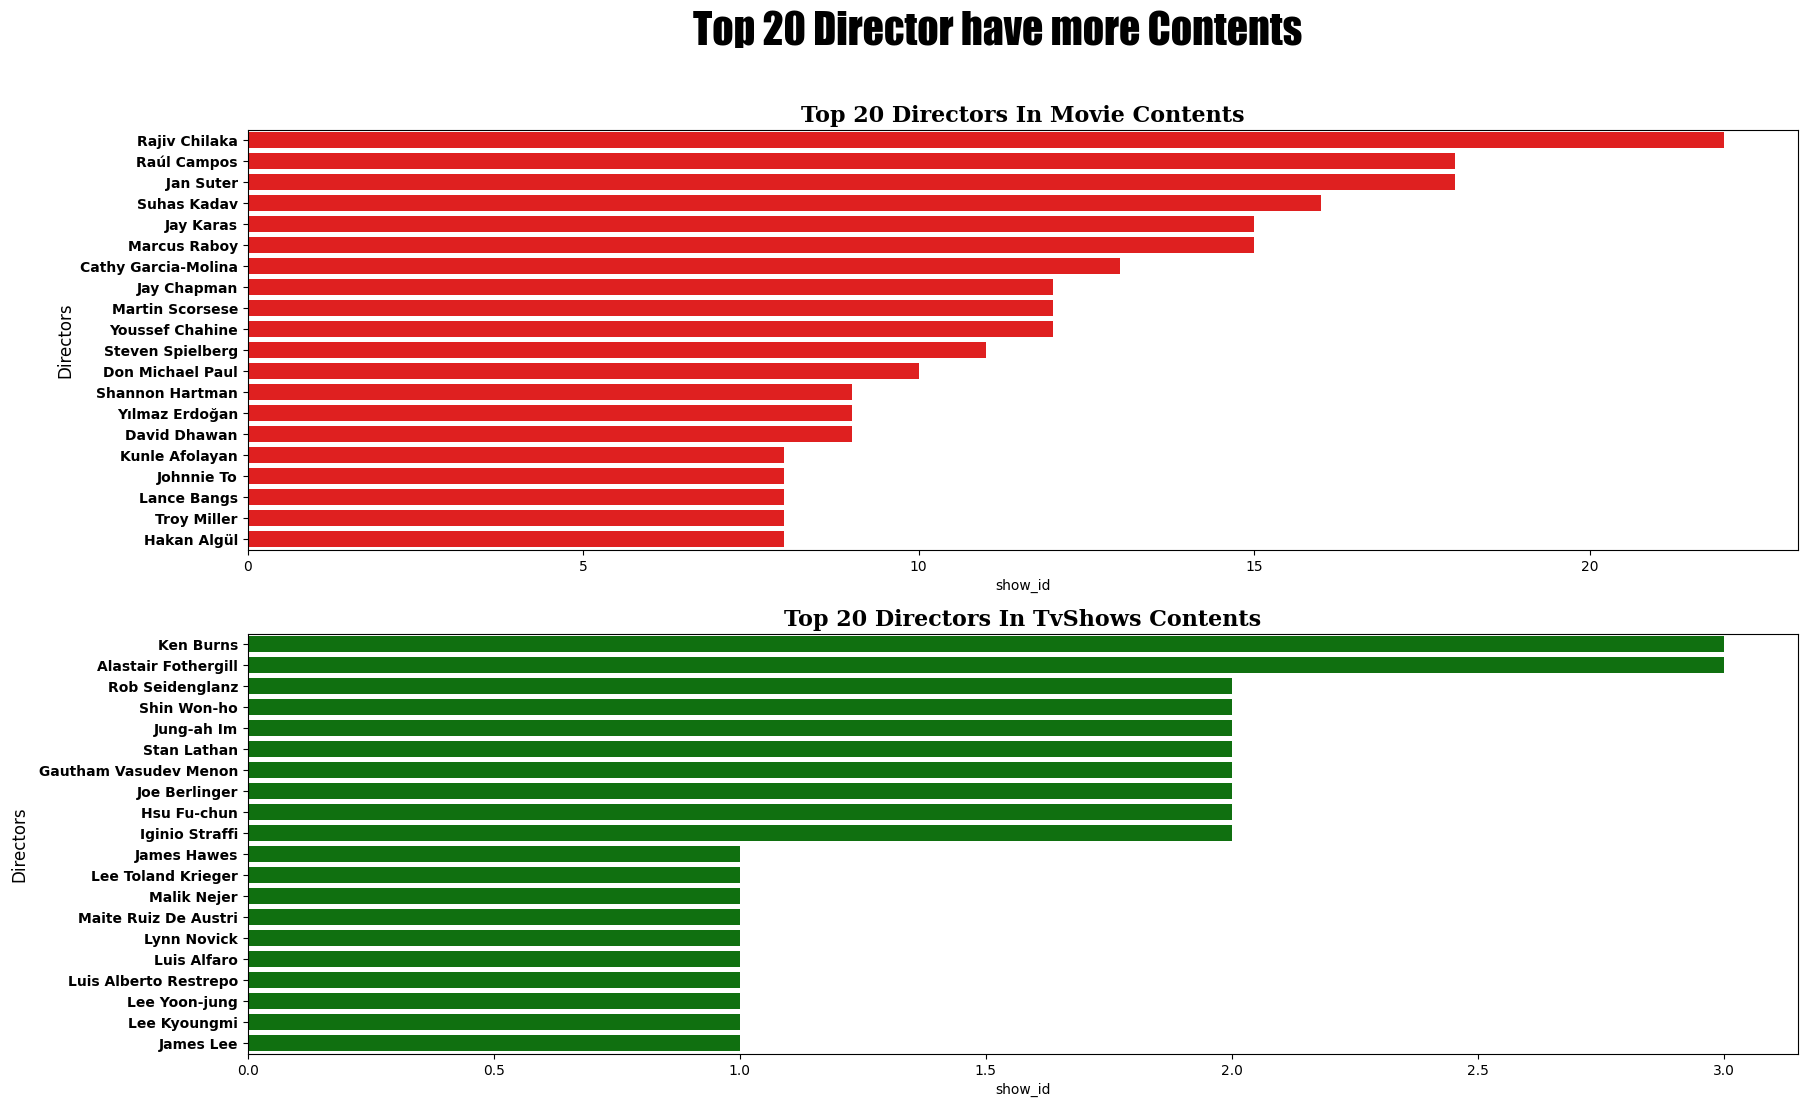

In [312]:
plt.figure(figsize=(20,12))
plt.suptitle('Top 20 Director have more Contents', fontsize=30,fontweight="bold",fontfamily='fantasy')


plt.subplot(2,1,1)
sns.barplot(md, y = md.index , x = 'show_id', color='red')
plt.title('Top 20 Directors In Movie Contents', fontsize=16,fontweight="bold",fontfamily='serif')
plt.yticks(fontweight='bold')
plt.ylabel('Directors',fontsize=12)

plt.subplot(2,1,2)
sns.barplot(tsd, y = tsd.index , x ='show_id',color='green')
plt.title('Top 20 Directors In TvShows Contents', fontsize=16,fontweight="bold",fontfamily='serif')
plt.yticks(fontweight='bold')
plt.ylabel('Directors',fontsize=12)

plt.show()

* Insights:-

Movies

- Rajiv Chilaka is the filmmaker with the highest number of movies, have directed 22 films.
- This shows a long and prolific career in filmmaking career.
- Raúl Campos & Jan Suter also having impressive directorial careers, with 18 movies each.
- This includes directors from various countries, such as India (Rajiv Chilaka, Suhas Kadav, David Dhawan),
the United States (Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, and more.

TvShows

- Some directors have worked on multiple shows.
- For example, Ken Burns and Alastair Fothergill have directed 3 TV Shows each, making them prolific in their contributions to these projects.
- The list of directors includes individuals from various backgrounds and countries, such as the United States (Ken Burns, Stan Lathan, Joe Berlinger, Lynn Novick, Rob Seidenglanz, Norm Hiscock, Oliver Stone), South Korea (Shin Won-ho), India (Gautham Vasudev Menon), Italy (Iginio Straffi), and more.
- This reflects the international reach and diversity of directors in the entertainment industry.

### *Q. Who are the Actor-Directors pair worked with each other the most ?*

In [313]:
ad = df[['cast','show_id','director','type']]
ad = ad[ad.cast!='Unknown actors']
ad = ad[ad.director!='Unknown director']
ad = ad.drop_duplicates().reset_index(drop=True)
ad

,cast,show_id,director,type
0,Sami Bouajila,s3,Julien Leclercq,TV Show
1,Tracy Gotoas,s3,Julien Leclercq,TV Show
2,Samuel Jouy,s3,Julien Leclercq,TV Show
3,Nabiha Akkari,s3,Julien Leclercq,TV Show
4,Sofia Lesaffre,s3,Julien Leclercq,TV Show
...,...,...,...,...
51184,Manish Chaudhary,s8807,Mozez Singh,Movie
51185,Meghna Malik,s8807,Mozez Singh,Movie
51186,Malkeet Rauni,s8807,Mozez Singh,Movie
51187,Anita Shabdish,s8807,Mozez Singh,Movie


In [315]:
nad = ad.groupby(['cast','director','type'])[['show_id']].nunique()
nad.rename(columns = {'show_id': 'counts'},inplace = True)

In [319]:
new_ad = nad.sort_values(by='counts',ascending=False).reset_index()
new_ad = new_ad.reset_index()

In [320]:
new_ad['ad_pair'] = new_ad['cast']+'-'+new_ad['director']
new_ad

,index,cast,director,type,counts,ad_pair
0,0,Julie Tejwani,Rajiv Chilaka,Movie,19,Julie Tejwani-Rajiv Chilaka
1,1,Rajesh Kava,Rajiv Chilaka,Movie,19,Rajesh Kava-Rajiv Chilaka
2,2,Rupa Bhimani,Rajiv Chilaka,Movie,18,Rupa Bhimani-Rajiv Chilaka
3,3,Jigna Bhardwaj,Rajiv Chilaka,Movie,18,Jigna Bhardwaj-Rajiv Chilaka
4,4,Vatsal Dubey,Rajiv Chilaka,Movie,16,Vatsal Dubey-Rajiv Chilaka
...,...,...,...,...,...,...
48755,48755,James Faulkner,Daisuke Nishio,Movie,1,James Faulkner- Daisuke Nishio
48756,48756,James Faulkner,Frank O'Connor,Movie,1,James Faulkner- Frank O'Connor
48757,48757,James Faulkner,Hideki Futamura,Movie,1,James Faulkner- Hideki Futamura
48758,48758,James Faulkner,Hiroshi Yamazaki,Movie,1,James Faulkner- Hiroshi Yamazaki


In [322]:
# seperate out data:
mad = new_ad[new_ad.type=='Movie']
tvad = new_ad[new_ad.type=='TV Show']

In [325]:
mad = mad[['ad_pair', 'counts']][:20]
tvad = tvad[['ad_pair', 'counts']][:20]

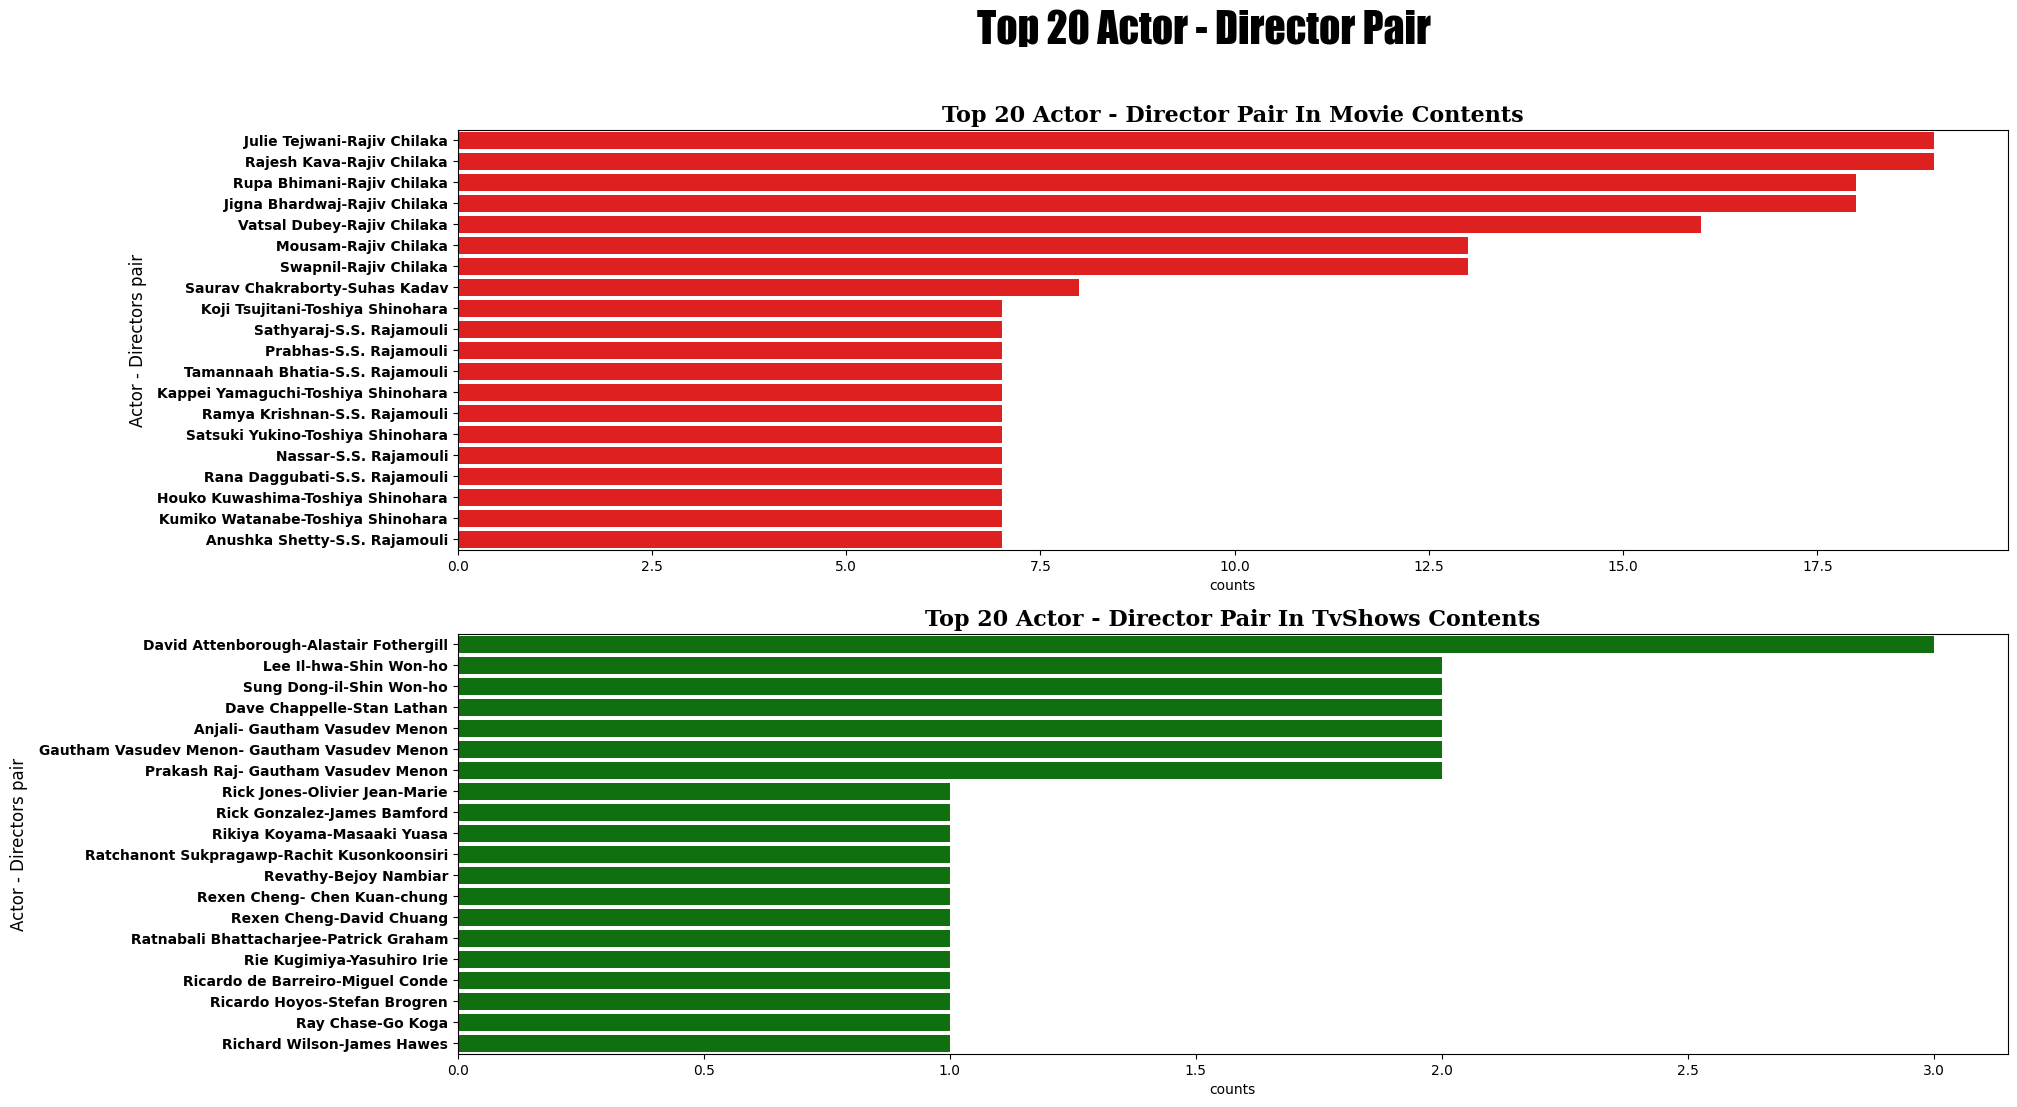

In [328]:
plt.figure(figsize=(20,12))
plt.suptitle('Top 20 Actor - Director Pair ', fontsize=30,fontweight="bold",fontfamily='fantasy')


plt.subplot(2,1,1)
sns.barplot(data = mad, y = 'ad_pair' , x = 'counts', color='red')
plt.title('Top 20 Actor - Director Pair In Movie Contents', fontsize=16,fontweight="bold",fontfamily='serif')
plt.yticks(fontweight='bold')
plt.ylabel('Actor - Directors pair',fontsize=12)

plt.subplot(2,1,2)
sns.barplot(tvad, y = 'ad_pair' , x ='counts', color='green')
plt.title('Top 20 Actor - Director Pair In TvShows Contents', fontsize=16,fontweight="bold",fontfamily='serif')
plt.yticks(fontweight='bold')
plt.ylabel('Actor - Directors pair',fontsize=12)

plt.show()

* Insights :

Movies

- Rajiv Chilaka, SS.Rajamouli & Taushia Shinohara are the most comfortable directors to work with.
- And has the high number repeat rate by which we can interpret that they are success combo to repeat both contentwise and financial profit yielding.

Tv Shows

- Similary David attenborough-Alister Fothergill and Houko Kuwashima-Toshiya Shinohara are repeat combos and yet they are successful repeat combos.


### *Q. What is the best time to launch a movie?*

In [329]:
movie_release = movies_data[['show_id','title','date_added']]
movie_release = movie_release.reset_index(drop=True)
movie_release.head()

,show_id,title,date_added
0,s1,Dick Johnson Is Dead,2021-09-25
1,s7,My Little Pony: A New Generation,2021-09-24
2,s7,My Little Pony: A New Generation,2021-09-24
3,s7,My Little Pony: A New Generation,2021-09-24
4,s7,My Little Pony: A New Generation,2021-09-24


In [330]:
movie_release.dtypes

show_id               object
title                 object
date_added    datetime64[ns]
dtype: object

In [332]:
movie_release.isna().sum()

show_id       0
title         0
date_added    0
dtype: int64

#### Feature engineering:

In [341]:
movie_release['uploaded_week'] = movie_release['date_added'].dt.isocalendar().week
movie_release['uploaded_weekday'] = movie_release['date_added'].dt.day_name()
movie_release['uploaded_month'] = movie_release['date_added'].dt.month_name()

In [360]:
week_movie_release = movie_release.groupby('uploaded_week')['show_id'].nunique()
week_movie_release = week_movie_release.reset_index()
week_movie_release.rename(columns = {'show_id': 'counts'},inplace = True)
week_movie_release.sort_values(by = 'counts', ascending = False)

,uploaded_week,counts
0,1,316
43,44,243
39,40,215
8,9,207
25,26,195
34,35,189
30,31,185
12,13,174
17,18,173
26,27,154


In [355]:
monthly_movie_release = movie_release.groupby('uploaded_month')['show_id'].nunique()
monthly_movie_release = monthly_movie_release.reset_index()
monthly_movie_release.rename(columns = {'show_id': 'counts'}, inplace = True)
monthly_movie_release = monthly_movie_release.sort_values(by='uploaded_month')
monthly_movie_release.reset_index(drop=True)
monthly_movie_release

,uploaded_month,counts
0,April,550
1,August,519
2,December,547
3,February,382
4,January,546
5,July,565
6,June,492
7,March,529
8,May,439
9,November,498


In [356]:
movies_release_pivot = movie_release.pivot_table(index='uploaded_month', 
                                                 columns='uploaded_weekday', 
                                                 values='show_id', 
                                                 aggfunc = pd.Series.nunique)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',  'Friday', 'Saturday','Sunday']
movies_release_pivot = movies_release_pivot[day_order]
movies_release_pivot

uploaded_weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
uploaded_month,,,,,,,
April,59,63,90,74,145,66,53
August,46,67,83,119,103,46,55
December,50,137,36,58,127,61,78
February,27,38,74,60,124,31,28
January,86,84,139,44,134,26,33
July,63,50,65,132,117,45,93
June,43,53,92,109,112,62,21
March,33,55,52,152,176,26,35
May,54,81,47,70,111,56,20


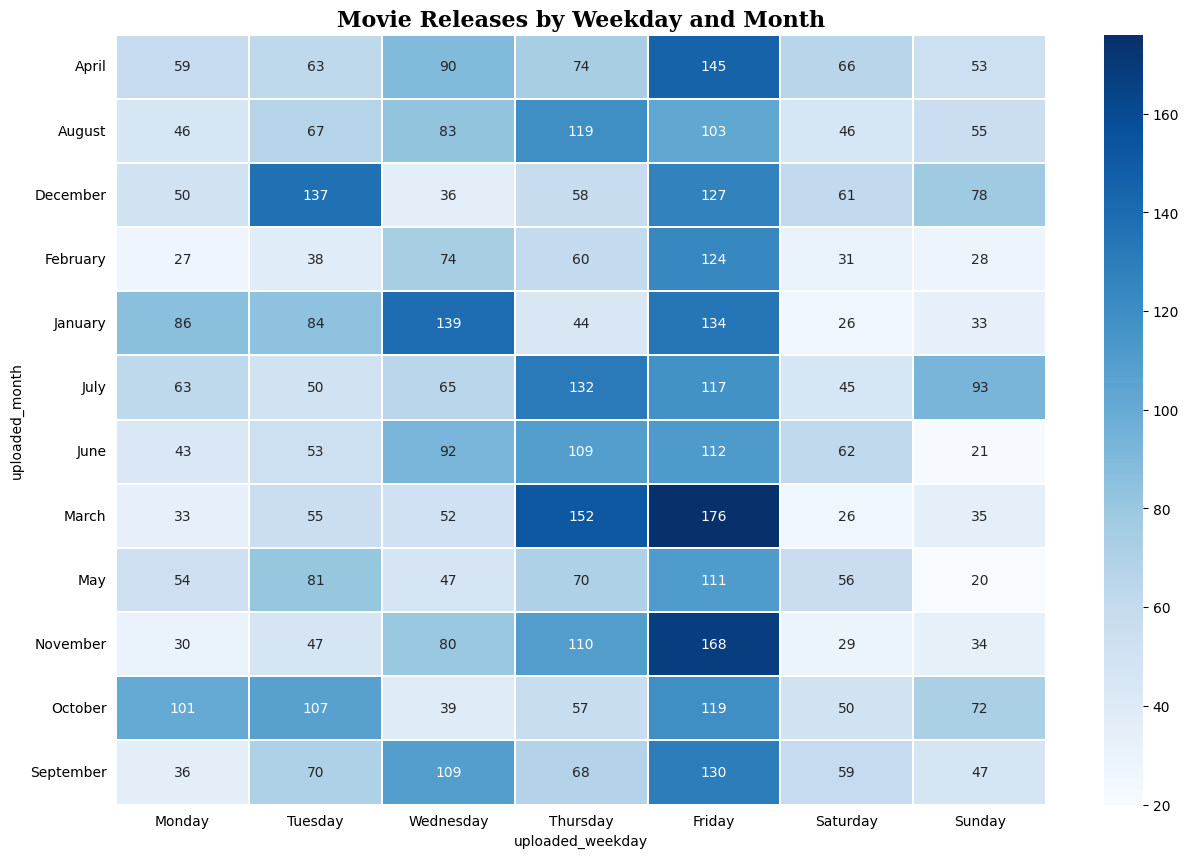

In [358]:
plt.figure(figsize=(15, 10))
sns.heatmap(movies_release_pivot, cmap='Blues', annot=True, fmt='d', linewidth=0.1)
plt.title("Movie Releases by Weekday and Month",
              fontfamily='serif',fontsize=16,fontweight='bold')
plt.tick_params(axis='both', which='both', left=False, bottom=False)
plt.show()

In [359]:
movies_release_pivot.sum().sort_values(ascending=False)

uploaded_weekday
Friday       1566
Thursday     1053
Wednesday     906
Tuesday       852
Monday        628
Sunday        569
Saturday      557
dtype: int64

* Insight for Movies data:

- Friday is the best weekday to upload the movies.
- From the historical data we observed that in the 1st week the content should be uploaded, and on the 4th week it should be avoided.
- And April is the best uploaded month for movies.

Correlation map:
- From the correlation map we observe that on the friday weekday we have very high correlation in comparison with the other weeks.
- and On March - friday and November - friday we have very high corrleation values.
- On the sunday of june we observe very low correlaion value. so this month and weekday we should avoid to upload.

### *Q. What is the best time to launch a Tvshow ?*

In [361]:
tvs_release = tvshows_data[['show_id','title','date_added']]
tvs_release = tvs_release.reset_index(drop=True)
tvs_release.head()

,show_id,title,date_added
0,s2,Blood & Water,2021-09-24
1,s2,Blood & Water,2021-09-24
2,s2,Blood & Water,2021-09-24
3,s2,Blood & Water,2021-09-24
4,s2,Blood & Water,2021-09-24


In [362]:
tvs_release.dtypes

show_id               object
title                 object
date_added    datetime64[ns]
dtype: object

In [363]:
tvs_release.isna().sum()

show_id       0
title         0
date_added    0
dtype: int64

In [364]:
tvs_release['uploaded_week'] = tvs_release['date_added'].dt.isocalendar().week
tvs_release['uploaded_weekday'] = tvs_release['date_added'].dt.strftime('%A')
tvs_release['uploaded_month'] = tvs_release['date_added'].dt.strftime('%B')

In [366]:
month_order = ['January', 'February', 'March', 'April', 'May',
               'June', 'July', 'August', 'September', 
               'October', 'November', 'December']
tvs_release['uploaded_month']= pd.Categorical(tvs_release['uploaded_month'],
                                    categories=month_order, ordered=True)

In [368]:
week_release = tvs_release.groupby('uploaded_week')['show_id'].nunique()
week_release = week_release.reset_index()
week_release.sort_values(by = 'show_id', ascending = False)

,uploaded_week,show_id
0,1,150
26,27,85
30,31,79
23,24,75
34,35,73
12,13,73
39,40,69
25,26,69
4,5,68
36,37,67


In [369]:
month_release = tvs_release.groupby('uploaded_month')['show_id'].nunique()
month_release = month_release.reset_index()
month_release.sort_values(by = 'show_id', ascending = False)

,uploaded_month,show_id
0,January,279
6,July,254
11,December,250
8,September,246
5,June,232
7,August,230
9,October,210
3,April,209
2,March,205
10,November,199


In [370]:
tvs_release_pivot = tvs_release.pivot_table(
            index='uploaded_month' , 
            columns='uploaded_weekday' , 
            values='show_id' , 
            aggfunc=pd.Series.nunique) 

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                 'Friday', 'Saturday','Sunday']
tvs_release_pivot = tvs_release_pivot[day_order]
tvs_release_pivot

uploaded_weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
uploaded_month,,,,,,,
January,13,19,128,19,85,5,10
February,20,13,28,27,63,17,7
March,11,25,32,22,88,16,11
April,20,20,38,38,58,21,14
May,21,26,25,15,74,17,9
June,22,16,35,29,77,47,6
July,22,50,32,29,82,29,10
August,23,41,30,26,80,18,12
September,13,29,44,34,87,15,24


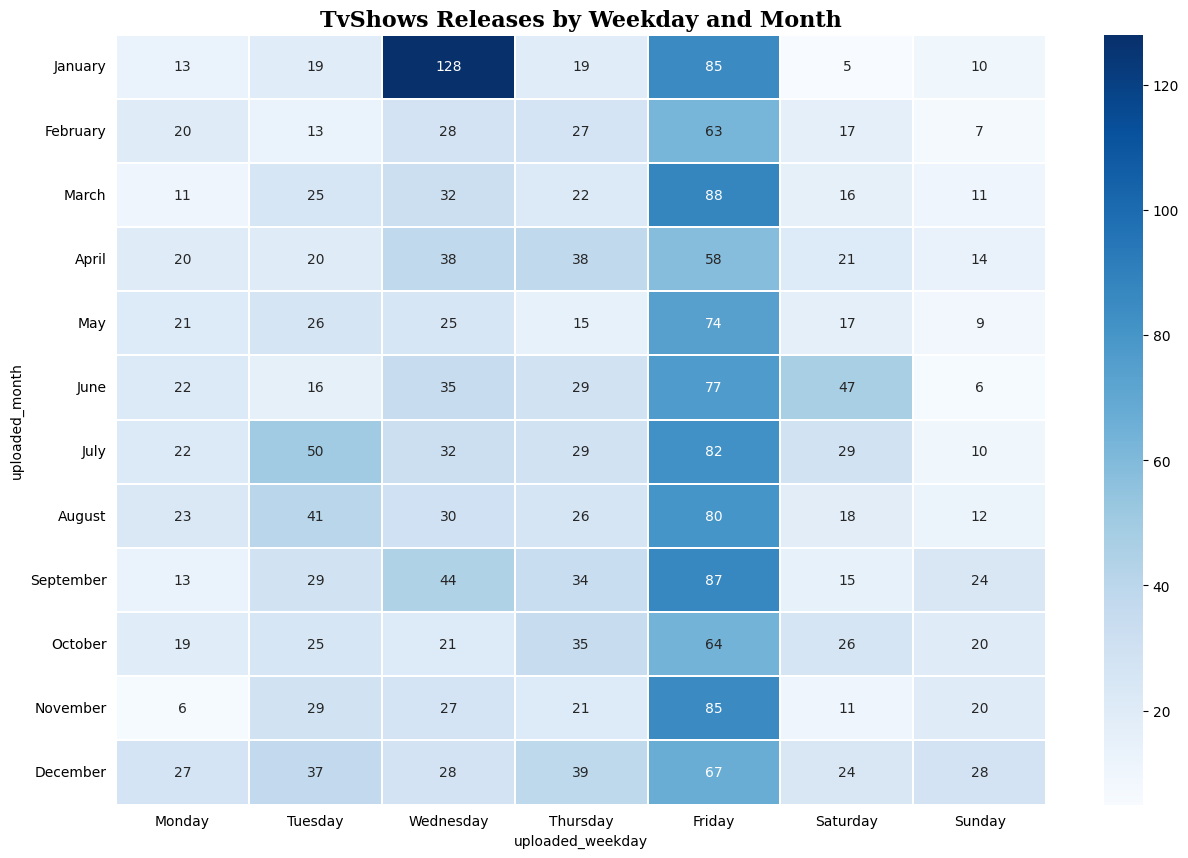

In [371]:
plt.figure(figsize=(15, 10))
plt.style.use('seaborn-v0_8-bright')
sns.heatmap(tvs_release_pivot, cmap='Blues', annot=True, 
                fmt='d' , linewidth=0.1)
plt.title("TvShows Releases by Weekday and Month",
                  fontfamily='serif',fontsize=16,fontweight='bold')
plt.tick_params(axis='both', which='both', left=False, bottom=False)
plt.show()

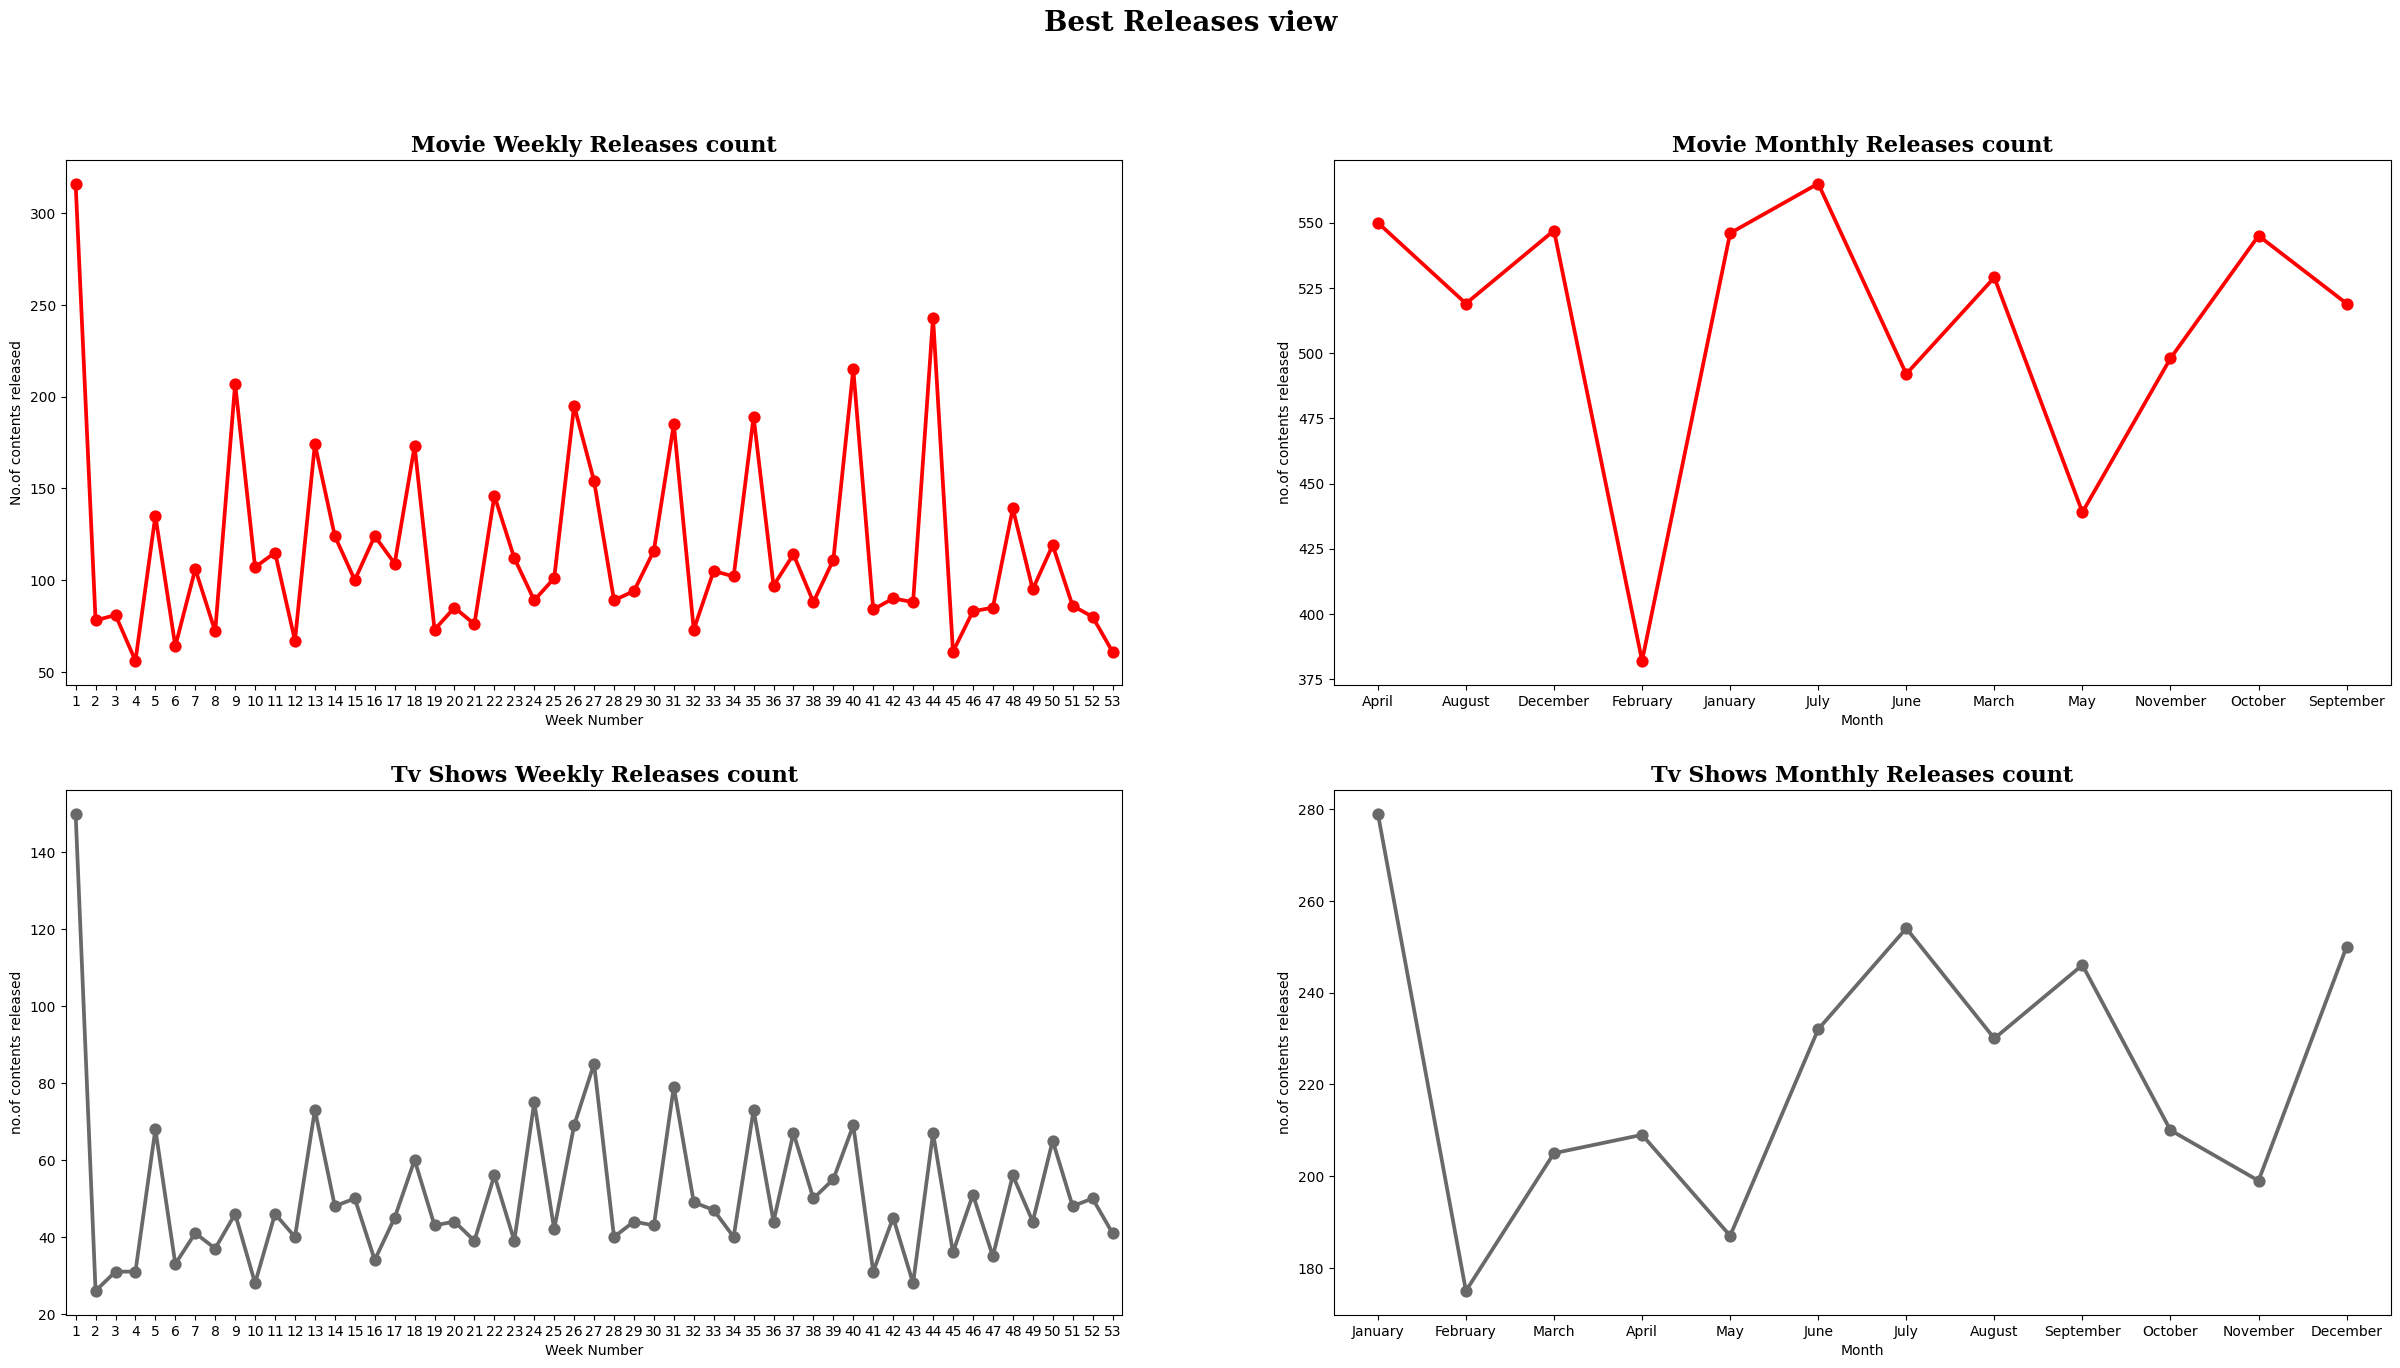

In [373]:
plt.figure(figsize=(30,15))
plt.suptitle('Best Releases view',fontfamily='serif', fontsize=20,fontweight='bold')

plt.subplot(2,2,1)
sns.pointplot(week_movie_release ,x = 'uploaded_week' , y ='counts' ,color='r')
plt.title('Movie Weekly Releases count',fontfamily='serif', fontsize=16,fontweight='bold')
plt.xlabel('Week Number')
plt.ylabel('No.of contents released')

plt.subplot(2,2,2)
sns.pointplot(monthly_movie_release , x ='uploaded_month' , y='counts' ,color='r')
plt.title('Movie Monthly Releases count',fontfamily='serif',
                      fontsize=16,fontweight='bold')
plt.xlabel('Month')
plt.ylabel('no.of contents released')

plt.subplot(2,2,3)
sns.pointplot(week_release ,x='uploaded_week' , y='show_id' ,color='dimgrey')
plt.title('Tv Shows Weekly Releases count',fontfamily='serif',
                      fontsize=16,fontweight='bold')
plt.xlabel('Week Number')
plt.ylabel('no.of contents released')

plt.subplot(2,2,4)
sns.pointplot(month_release ,x='uploaded_month' , y='show_id' ,color='dimgrey')
plt.title('Tv Shows Monthly Releases count',fontfamily='serif',
                          fontsize=16,fontweight='bold')
plt.xlabel('Month')
plt.ylabel('no.of contents released')

plt.show()

* Insight for Tv shows data:

- Friday is the best weekday to upload the Tv shows.
- From the historical data we observed that in the 1st week the content should be uploaded, and on the 43rd of week it should be avoided.
- And January and July are the best month for the uploading  for TVshows .

Correlation map:
- From the correlation map we observe that on the also friday weekday we have very high correlation in comparison with the other weeks.
- and On jan - wed we have very high corrleation values.
- On the sunday - june we observe very low correlaion value. so this month and weekday we should avoid to upload.

### *Q. Find After how many days the contents will be added to Netflix after the release date?*

In [374]:
filtered_md = movies_data[['show_id','title','release_year','year_added']].drop_duplicates()

In [375]:
filtered_md['time_diff_in_yrs']=filtered_md['year_added'] - filtered_md['release_year']

In [376]:
filtered_md.sample()

,show_id,title,release_year,year_added,time_diff_in_yrs
116129,s7351,Love Shot,2018,2019,1


In [382]:
filtered_md['time_diff_in_yrs'].mode()[0], filtered_md['time_diff_in_yrs'].value_counts()[0]

(0, 1862)

- Insights:

- Time difference is 0 indicating that the contents are added to the netflix library within the same year.
- The contents are added to the Netflix OTT platform within some months or days of release.

In [383]:
fmdg = filtered_md.groupby(['time_diff_in_yrs'])[['title']].agg(numbers_released = ('title','count'))
fmdg

,numbers_released
time_diff_in_yrs,
-1,2
0,1862
1,1178
2,491
3,347
...,...
71,1
72,3
73,3


In [384]:
filtered_md[filtered_md.time_diff_in_yrs == -1]

,show_id,title,release_year,year_added,time_diff_in_yrs
80216,s5395,Hans Teeuwen: Real Rancour,2018,2017,-1
110136,s7064,Incoming,2019,2018,-1


- Insights:
- Movies like Hans Teewen & Incoming are uploaded in OTT (1 year) before the Theatrical Release.
- Now a days , some Movies are produced and made specifically for direct NETFLIX OTT RELEASE.

#### TV shows

In [385]:
filtered_tvd = tvshows_data[['show_id','title','release_year','year_added']].drop_duplicates()
filtered_tvd['time_diff_in_yrs']=filtered_tvd['year_added']-filtered_tvd['release_year']

In [386]:
filtered_tvd['time_diff_in_yrs'].mode()[0], filtered_tvd['time_diff_in_yrs'].mode()

(0,
 0    0
 Name: time_diff_in_yrs, dtype: int64)

- Insights:
- Time difference is ZERO indicating that the contents are added to the netflix library within the same year.
- The contents are added to the Netflix OTT platform within some months or days of release.

In [387]:
filtered_tvd[filtered_tvd.time_diff_in_yrs<0]

,show_id,title,release_year,year_added,time_diff_in_yrs
11555,s1552,Hilda,2021,2020,-1
12696,s1697,Polly Pocket,2021,2020,-1
22307,s2921,Love Is Blind,2021,2020,-1
24727,s3169,Fuller House,2020,2019,-1
26073,s3288,Maradona in Mexico,2020,2019,-1
26953,s3370,BoJack Horseman,2020,2019,-1
27389,s3434,The Hook Up Plan,2020,2019,-1
39091,s4845,Unbreakable Kimmy Schmidt,2019,2018,-1
39095,s4846,Arrested Development,2019,2018,-1
44911,s5659,Sense8,2018,2016,-2


#### Insights:



MOVIES

- Upon considering the recent releases in Netflix, it is seen that the contracts says, the Movie will be released in the window of the 50-60 days (4 Weeks) after the theatrical releases.
- The Mode of the release time difference between OTT vs Theatrical is found to be Zero years so we consider it is released with some months or weeks gap.
- We can also see that movies like Incoming & Hans Teeuwen: Real Rancour is released in Netflix Platform before theatrical release, thus indicating the release time difference is negative.

TvShows

- As of Televisions shows, the contents(episodes) are added to Netflix library within 24 Hours of airing on the Television.
- We can that the Mode of release time difference is Zero year as well indication that window is too short for OTT updation of episodes and contents.
- Shows like Sense8,Jack Taylor and much more are specifically tailor made for Netflix OTT releases.

### *Days to add contents Netflix Library after acquiring rights: (Recent past data)*

In [389]:
cu = df.copy()
cu = cu.drop_duplicates(subset='show_id')
#cu['date_added'] = pd.to_datetime(cu['date_added'])
cu['release_date'] = pd.to_datetime(cu['release_year'].astype(str))
cu

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,release_date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown actors,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,2020-01-01
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021,2021-01-01
58,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,Unknown,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,2021,2021-01-01
85,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown actors,Unknown,2021-09-24,2021,TV-MA,1 Season,Docuseries,2021,2021-01-01
87,s5,TV Show,Kota Factory,Unknown director,Mayur More,India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201976,s8803,Movie,Zodiac,David Fincher,Mark Ruffalo,United States,2019-11-20,2007,R,158 min,Cult Movies,2019,2007-01-01
202006,s8804,TV Show,Zombie Dumb,Unknown director,Unknown actors,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,Kids' TV,2019,2018-01-01
202009,s8805,Movie,Zombieland,Ruben Fleischer,Jesse Eisenberg,United States,2019-11-01,2009,R,88 min,Comedies,2019,2009-01-01
202023,s8806,Movie,Zoom,Peter Hewitt,Tim Allen,United States,2020-01-11,2006,PG,88 min,Children & Family Movies,2020,2006-01-01


In [390]:
cu['days_to_add'] = (cu['date_added'] - cu['release_date']).dt.days
cu

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,release_date,days_to_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown actors,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,2020-01-01,633
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021,2021-01-01,266
58,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,Unknown,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,2021,2021-01-01,266
85,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown actors,Unknown,2021-09-24,2021,TV-MA,1 Season,Docuseries,2021,2021-01-01,266
87,s5,TV Show,Kota Factory,Unknown director,Mayur More,India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021,2021-01-01,266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201976,s8803,Movie,Zodiac,David Fincher,Mark Ruffalo,United States,2019-11-20,2007,R,158 min,Cult Movies,2019,2007-01-01,4706
202006,s8804,TV Show,Zombie Dumb,Unknown director,Unknown actors,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,Kids' TV,2019,2018-01-01,546
202009,s8805,Movie,Zombieland,Ruben Fleischer,Jesse Eisenberg,United States,2019-11-01,2009,R,88 min,Comedies,2019,2009-01-01,3956
202023,s8806,Movie,Zoom,Peter Hewitt,Tim Allen,United States,2020-01-11,2006,PG,88 min,Children & Family Movies,2020,2006-01-01,5123


In [392]:
# filtering the recent past data (after 2018) for movies
fcum = cu[(cu.release_year >= 2018) & (cu.type == 'Movie')]
fcum.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,release_date,days_to_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown actors,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,2020-01-01,633
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,2021,2021-01-01,266
331,s10,Movie,The Starling,Theodore Melfi,Melissa McCarthy,United States,2021-09-24,2021,PG-13,104 min,Comedies,2021,2021-01-01,266
431,s13,Movie,Je Suis Karl,Christian Schwochow,Luna Wedler,Germany,2021-09-23,2021,TV-MA,127 min,Dramas,2021,2021-01-01,265
475,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Klara Castanho,Unknown,2021-09-22,2021,TV-PG,91 min,Children & Family Movies,2021,2021-01-01,264


In [398]:
fcum['days_to_add'].value_counts()

days_to_add
334     16
304     13
318     12
181     12
212     12
        ..
85       1
1143     1
452      1
820      1
659      1
Name: count, Length: 741, dtype: int64

In [393]:
upload_date_interval_movie = fcum['days_to_add'].mode()[0]
upload_date_interval_movie

334

In [394]:
# filtering the recent past data (after 2018) for tvshows
fcutv = cu[(cu.release_year>2018) & (cu.type=='TV Show')]
fcutv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,release_date,days_to_add
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021,2021-01-01,266
58,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,Unknown,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,2021,2021-01-01,266
85,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown actors,Unknown,2021-09-24,2021,TV-MA,1 Season,Docuseries,2021,2021-01-01,266
87,s5,TV Show,Kota Factory,Unknown director,Mayur More,India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021,2021-01-01,266
111,s6,TV Show,Midnight Mass,Mike Flanagan,Kate Siegel,Unknown,2021-09-24,2021,TV-MA,1 Season,TV Dramas,2021,2021-01-01,266


In [395]:
fcutv['days_to_add'].value_counts()

days_to_add
 0      10
 164    10
 79     10
 219     9
 186     9
        ..
 521     1
 104     1
 518     1
 149     1
-217     1
Name: count, Length: 438, dtype: int64

### *Q. Whats the shortest and longest duration of contents ?*

In [401]:
#Shortest Movie
shortest_movie = movies_data.loc[(movies_data['runtime_mins'] == np.min(movies_data.runtime_mins))][['title','runtime_mins']].drop_duplicates()
shortest_movie

,title,runtime_mins
58415,Silent,3


In [402]:
#Longest Movie
longest_movie = movies_data.loc[(movies_data['runtime_mins']==np.max(movies_data.runtime_mins))][['title','runtime_mins']].drop_duplicates()
longest_movie

,title,runtime_mins
64159,Black Mirror: Bandersnatch,312


## **PAIRPLOT:** 

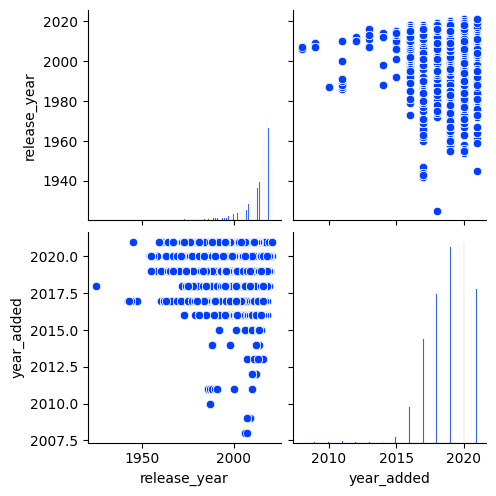

In [403]:
sns.pairplot(df);

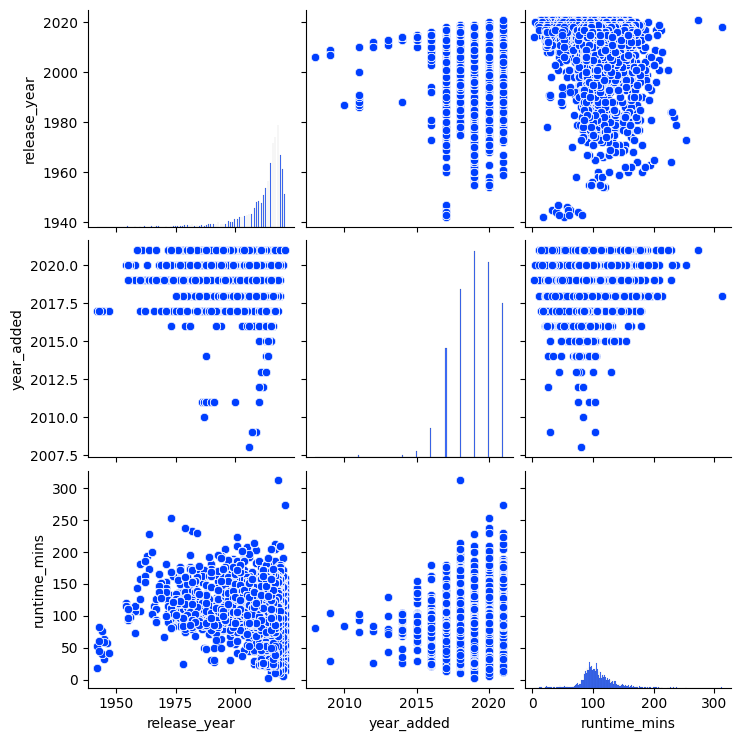

In [404]:
sns.pairplot(movies_data);

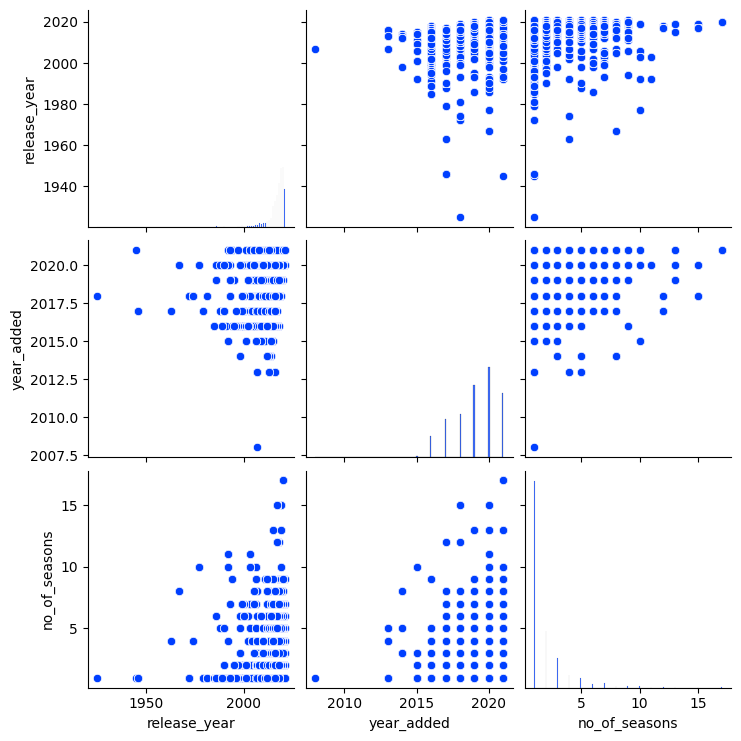

In [405]:
sns.pairplot(tvshows_data);

## **CORRELATION: OR HEATMAP**

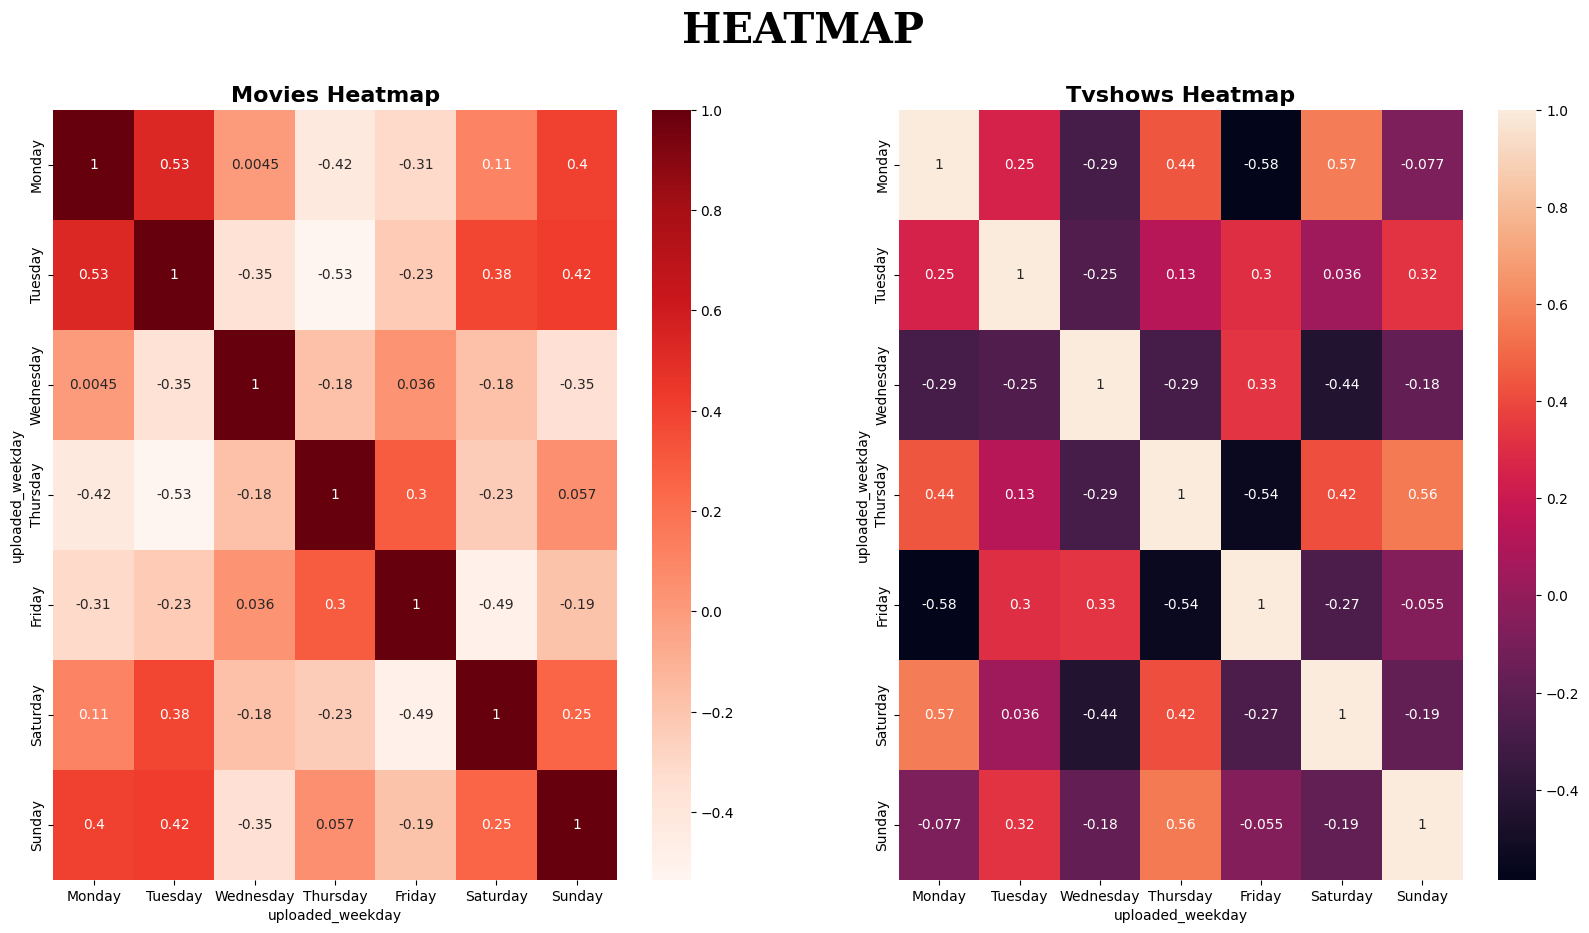

In [408]:
plt.figure(figsize=(20,10))
plt.suptitle('HEATMAP',fontsize=30,fontfamily='serif',fontweight='bold')

plt.subplot(1,2,1)
sns.heatmap(movies_release_pivot.corr() ,cmap='Reds',annot=True)
plt.title('Movies Heatmap',fontsize=16,fontweight='bold')

plt.subplot(1,2,2)
sns.heatmap(tvs_release_pivot.corr() ,annot=True)
plt.title('Tvshows Heatmap',fontsize=16,fontweight='bold')


plt.show()


* The correlation are found to nominal and on an average it is found that data has a Positive Correlation on weekly uploading rate

# **Summary and Recommendations**

- Movie Releases Trend: The number of movies released each year has been increasing, especially in the last decade.
- *Recommendation: Continue investing in movie content as it shows strong growth.*

- TV Shows vs. Movies: Movies are more prevalent than TV shows.
- *Recommendation: Balance the content library by increasing the production and acquisition of TV shows.*

- Best Time to Launch TV Shows: Jan the peak months for TV show releases can help maximize viewership.
- *Recommendation: Launch new TV shows during these peak periods.*

- Actors/Directors Analysis: Popular actors and directors can attract more viewers.
- *Recommendation: Collaborate with frequently featured actors and directors to draw their fanbase.*

- Focus on TV Shows in Recent Years: As per the crrent scenario there is a shift towards more TV shows from movies.
- *Recommendation: Maintain this focus and continue to diversify the content offerings with new TV shows.*

- Content in Different Countries: The USA dominates in content availability.
- *Recommendation: Diversify the content library by acquiring more titles from other countries to cater to a global audience.*

- Content Management: Timely release of the contents ensure credibility and earns a good trust among the subscribers. The strategic Decisions of the release weekday , month matters and should be aligned with the viewers expectations.

- Personalize user experience: Netflix could do more to personalize the user experience.
- They could provide some extra features, for example ; to save the content more easily or to find it or download it.
  
- Improve the user interface: Netflix's user interface is generally good, but it could be improved. and improved the download qualtiy so that people will not get bored or have good content experience.

- Provide a lower-priced ad-supported tier: Netflix could offer a lower-priced ad-supported to attract more subscribers.
- This would allow the company to reach a wider audience and Generate more revenue.

- These strategic decisions of release date and time would make the viewers count increase rapidly. Having the ANIME contents have shown as an interest for many views.